### Problem Statement

Bank of England provided a dataset containing key demographic and financial details of bank customers. The bank needs to improve customer retention strategies, optimize financial products, and better understand customer behavior across different segments.

### Objectives

Utilizing the dataset containing key demographic and financial details of bank customers. We would answer questions that would help us understand the demographic of the bank customers, the financial characteristics of the bank customers, identifying trends and patterns in customer engagement, and highlighting potential areas for business improvement.

### Approach

To solve this problem, we are going to utilize the standard approach for data mining;

 - Proper Understanding of the data
 - Prepare the data for analysis
 - Answering the questions to help us achieve our objectives
 - Draw conclusions
 - Prepare a summary

### Data Understanding/Exploration

In [2099]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
import statsmodels.api as sm
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')


In [2101]:
# Read and merging in the dataset

cust_info = pd.read_excel('Bank_Churn_Messy.xlsx')

acct_info = pd.read_excel('Bank_Churn_Messy.xlsx',sheet_name= 'Account_Info')

bank_eng = pd.merge(cust_info,acct_info, on= 'CustomerId', how= 'left')



In [2102]:
bank_eng.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [2103]:
bank_eng.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [2104]:
bank_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


# Inconsistencies

 - We would not need the Surname because it does not answer the questions in the objective.
 - We will check if Tenure_x and Tenure_y are different columns and we would remove one column if they are the same columns.
 - We would need to rename HasCrCard to Credit Card,IsActiveMember to Active Member,NumOfProducts to Total Products,Tenure_y to       Tenure,so it gives more lucidity to the information.
 -  We would remove the duplicates and null values.
 - We would need to convert Age column to a proper data type(integer).
 - We would convert Exited column to a string.
 - We would convert EstimatedSalary and Balance colmns to a float for ease analysis.
   

Here is the data dictionary for more insight of the data

CustomerId: A unique identifier for each customer.

Surname: The customer's last name.

CreditScore: A numerical score representing the customer's creditworthiness.	

Geography: The geographical location of the customer (e.g., country or region).

Gender:	The gender of the customer.	

Age: The customer's age.

Tenure:	Number of years the customer has been with the bank (possibly).	

EstimatedSalary: The estimated annual salary of the customer.

Balance: The current balance in the customer's account.

Total Products: The number of products the customer has with the bank (e.g., savings, loans).

Credit Card: Whether the customer has a credit card with the bank.

Active Member: Whether the customer is an active member of the bank.

Exited: The target variable indicating whether the customer has exited the bank.


### Data Cleaning


In [2112]:
# Removing CustomerId and Surname columns
bank_eng.drop({'Surname'},axis=1,inplace=True)

In [2114]:
bank_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   CreditScore      10004 non-null  int64  
 2   Geography        10004 non-null  object 
 3   Gender           10004 non-null  object 
 4   Age              10001 non-null  float64
 5   Tenure_x         10004 non-null  int64  
 6   EstimatedSalary  10004 non-null  object 
 7   Balance          10004 non-null  object 
 8   NumOfProducts    10004 non-null  int64  
 9   HasCrCard        10004 non-null  object 
 10  Tenure_y         10004 non-null  int64  
 11  IsActiveMember   10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1016.2+ KB


In [2116]:
# Comparison of two different columns
comp_df=bank_eng.Tenure_x,bank_eng.Tenure_y
comp_df

(0        2
 1        2
 2        1
 3        8
 4        1
         ..
 9999     3
 10000    4
 10001    4
 10002    4
 10003    4
 Name: Tenure_x, Length: 10004, dtype: int64,
 0        2
 1        2
 2        1
 3        8
 4        1
         ..
 9999     3
 10000    4
 10001    4
 10002    4
 10003    4
 Name: Tenure_y, Length: 10004, dtype: int64)

Tenure_x and Tenure_y are the same column,we would need to remove one column.

In [2119]:
# Remove a column

bank_eng.drop('Tenure_x',axis=1,inplace=True)

In [2121]:
bank_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   CreditScore      10004 non-null  int64  
 2   Geography        10004 non-null  object 
 3   Gender           10004 non-null  object 
 4   Age              10001 non-null  float64
 5   EstimatedSalary  10004 non-null  object 
 6   Balance          10004 non-null  object 
 7   NumOfProducts    10004 non-null  int64  
 8   HasCrCard        10004 non-null  object 
 9   Tenure_y         10004 non-null  int64  
 10  IsActiveMember   10004 non-null  object 
 11  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 938.0+ KB


In [2123]:
# Rename columns

bank_eng.rename(columns={'HasCrCard':'Credit Card','IsActiveMember':'Active Member',
                         'NumOfProducts':'Total Products','Tenure_y':'Tenure'},inplace=True)

In [2125]:
bank_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   CreditScore      10004 non-null  int64  
 2   Geography        10004 non-null  object 
 3   Gender           10004 non-null  object 
 4   Age              10001 non-null  float64
 5   EstimatedSalary  10004 non-null  object 
 6   Balance          10004 non-null  object 
 7   Total Products   10004 non-null  int64  
 8   Credit Card      10004 non-null  object 
 9   Tenure           10004 non-null  int64  
 10  Active Member    10004 non-null  object 
 11  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 938.0+ KB


In [2127]:
# Checking if the data has null values

bank_eng.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                3
EstimatedSalary    0
Balance            0
Total Products     0
Credit Card        0
Tenure             0
Active Member      0
Exited             0
dtype: int64

Age column has null values 

In [2130]:
bank_eng.isnull().sum()/ len(bank_eng)*100

CustomerId         0.000000
CreditScore        0.000000
Geography          0.000000
Gender             0.000000
Age                0.029988
EstimatedSalary    0.000000
Balance            0.000000
Total Products     0.000000
Credit Card        0.000000
Tenure             0.000000
Active Member      0.000000
Exited             0.000000
dtype: float64

In [2132]:
bank_eng['Age'].value_counts()

Age
37.0    478
38.0    477
35.0    474
36.0    456
34.0    447
       ... 
92.0      2
82.0      1
88.0      1
85.0      1
83.0      1
Name: count, Length: 70, dtype: int64

In [2134]:
bank_eng[bank_eng['Age'].isnull()]

,CustomerId,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,Total Products,Credit Card,Tenure,Active Member,Exited
29,15728693,574,Germany,Female,NaN,-€999999,€141349.43,1,Yes,3,Yes,0
122,15580203,674,Spain,Male,NaN,-€999999,€120193.42,1,No,6,No,0
9390,15756954,538,France,Female,NaN,-€999999,€0.0,1,Yes,2,Yes,0


We would remove the rows that has null values on the Age column because the EstimatedSalary where the null values is found are negative.

In [2137]:
bank_eng.dropna(axis=0,inplace=True)

In [2139]:
bank_eng.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
EstimatedSalary    0
Balance            0
Total Products     0
Credit Card        0
Tenure             0
Active Member      0
Exited             0
dtype: int64

In [2141]:
# Checking for duplicates
bank_eng.duplicated().sum()

4

In [2143]:
# Removing Duplicates
bank_eng=bank_eng.drop_duplicates()

In [2145]:
bank_eng.duplicated().sum()

0

In [2147]:
bank_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   CreditScore      9997 non-null   int64  
 2   Geography        9997 non-null   object 
 3   Gender           9997 non-null   object 
 4   Age              9997 non-null   float64
 5   EstimatedSalary  9997 non-null   object 
 6   Balance          9997 non-null   object 
 7   Total Products   9997 non-null   int64  
 8   Credit Card      9997 non-null   object 
 9   Tenure           9997 non-null   int64  
 10  Active Member    9997 non-null   object 
 11  Exited           9997 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 1015.3+ KB


In [2149]:
# Convert Age column to a appropriate data type
bank_eng['Age']=bank_eng['Age'].astype('int64')

In [2151]:
bank_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       9997 non-null   int64 
 1   CreditScore      9997 non-null   int64 
 2   Geography        9997 non-null   object
 3   Gender           9997 non-null   object
 4   Age              9997 non-null   int64 
 5   EstimatedSalary  9997 non-null   object
 6   Balance          9997 non-null   object
 7   Total Products   9997 non-null   int64 
 8   Credit Card      9997 non-null   object
 9   Tenure           9997 non-null   int64 
 10  Active Member    9997 non-null   object
 11  Exited           9997 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 1015.3+ KB


In [2153]:
# Convert Exited data type to a string
bank_eng['Exited']=bank_eng['Exited'].astype('object')


In [2155]:
bank_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerId       9997 non-null   int64 
 1   CreditScore      9997 non-null   int64 
 2   Geography        9997 non-null   object
 3   Gender           9997 non-null   object
 4   Age              9997 non-null   int64 
 5   EstimatedSalary  9997 non-null   object
 6   Balance          9997 non-null   object
 7   Total Products   9997 non-null   int64 
 8   Credit Card      9997 non-null   object
 9   Tenure           9997 non-null   int64 
 10  Active Member    9997 non-null   object
 11  Exited           9997 non-null   object
dtypes: int64(5), object(7)
memory usage: 1015.3+ KB


In [2157]:
# we need to remove the symbol for ease conversion of data type
bank_eng['Balance']=bank_eng['Balance'].str.replace('€', '',)

In [2159]:
bank_eng['EstimatedSalary']=bank_eng['EstimatedSalary'].str.replace('€', '',)

In [2161]:
bank_eng.head()

,CustomerId,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,Total Products,Credit Card,Tenure,Active Member,Exited
0,15634602,619,FRA,Female,42,101348.88,0.0,1,Yes,2,Yes,1
2,15647311,608,Spain,Female,41,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,502,French,Female,42,113931.57,159660.8,3,No,8,No,1
4,15701354,699,FRA,Female,39,93826.63,0.0,2,No,1,No,0
5,15737888,850,Spain,Female,43,79084.1,125510.82,1,Yes,2,Yes,0


In [2163]:
# Convert Balance column to an appropriate data type
bank_eng['Balance']=bank_eng['Balance'].astype('float64')

In [2165]:
# Convert EstimatedSalary column to an appropriate data type
bank_eng['EstimatedSalary']=bank_eng['EstimatedSalary'].astype('float64')

In [2167]:
bank_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   CreditScore      9997 non-null   int64  
 2   Geography        9997 non-null   object 
 3   Gender           9997 non-null   object 
 4   Age              9997 non-null   int64  
 5   EstimatedSalary  9997 non-null   float64
 6   Balance          9997 non-null   float64
 7   Total Products   9997 non-null   int64  
 8   Credit Card      9997 non-null   object 
 9   Tenure           9997 non-null   int64  
 10  Active Member    9997 non-null   object 
 11  Exited           9997 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1015.3+ KB


In [2169]:
# Replacement of names in the rows
bank_eng['Geography']= bank_eng['Geography'].str.replace('FRA','France').replace('French','France')

In [2171]:
bank_eng.head()

,CustomerId,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,Total Products,Credit Card,Tenure,Active Member,Exited
0,15634602,619,France,Female,42,101348.88,0.00,1,Yes,2,Yes,1
2,15647311,608,Spain,Female,41,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,502,France,Female,42,113931.57,159660.80,3,No,8,No,1
4,15701354,699,France,Female,39,93826.63,0.00,2,No,1,No,0
5,15737888,850,Spain,Female,43,79084.10,125510.82,1,Yes,2,Yes,0


In [2173]:
bank_eng.tail()

,CustomerId,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,Total Products,Credit Card,Tenure,Active Member,Exited
9996,15606229,771,France,Male,39,96270.64,0.00,2,No,5,No,0
9997,15569892,516,France,Male,35,101699.77,57369.61,1,Yes,10,Yes,0
9998,15584532,709,France,Female,36,42085.58,0.00,1,Yes,7,Yes,1
9999,15682355,772,Germany,Male,42,92888.52,75075.31,2,No,3,No,1
10000,15628319,792,France,Female,28,38190.78,130142.79,1,No,4,No,0


In [2175]:
bank_eng.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'EstimatedSalary', 'Balance', 'Total Products', 'Credit Card', 'Tenure',
       'Active Member', 'Exited'],
      dtype='object')

In [2177]:
bank_eng.shape

(9997, 12)

In [2179]:
bank_eng_copy=bank_eng.copy()

In [2181]:
# Export cleaned data
bank_eng.to_csv('Cleaned_bank_customer_data.csv')

### Data Exploration/Preparation 

In [2184]:
# Categorize the columns into categorical and numerical
cat_columns=[i for i in bank_eng.select_dtypes(include=['object']).columns]
num_columns=[i for i in bank_eng.select_dtypes(include=['int64','float64']).columns]

In [2186]:
print(cat_columns)

['Geography', 'Gender', 'Credit Card', 'Active Member', 'Exited']


In [2188]:
print(num_columns)

['CustomerId', 'CreditScore', 'Age', 'EstimatedSalary', 'Balance', 'Total Products', 'Tenure']


In [2190]:
# Summary statistics of the data
bank_eng.describe()

,CustomerId,CreditScore,Age,EstimatedSalary,Balance,Total Products,Tenure
count,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,1.569094e+07,650.545364,38.922077,100092.222656,76482.679807,1.530359,5.013204
std,7.193443e+04,96.657932,10.489072,57518.775702,62397.174721,0.581669,2.892364
min,1.556570e+07,350.000000,18.000000,11.580000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,50974.570000,0.000000,1.000000,3.000000
50%,1.569073e+07,652.000000,37.000000,100236.020000,97188.620000,1.000000,5.000000
75%,1.575323e+07,718.000000,44.000000,149399.700000,127642.440000,2.000000,7.000000
max,1.581569e+07,850.000000,92.000000,199992.480000,250898.090000,4.000000,10.000000


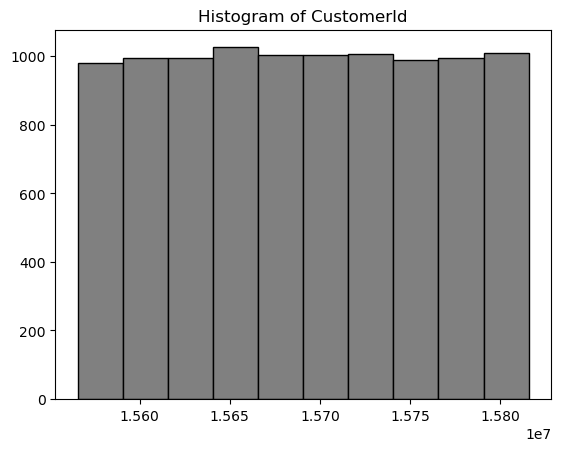

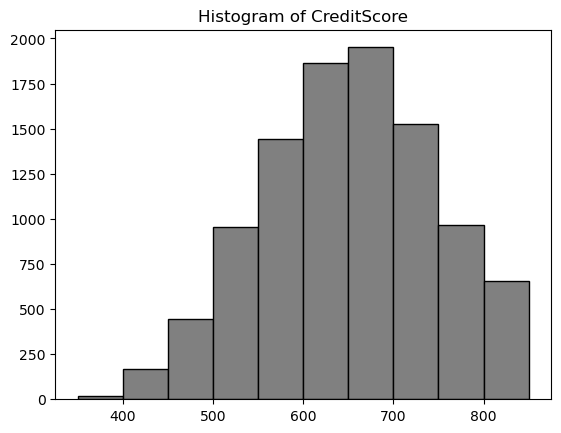

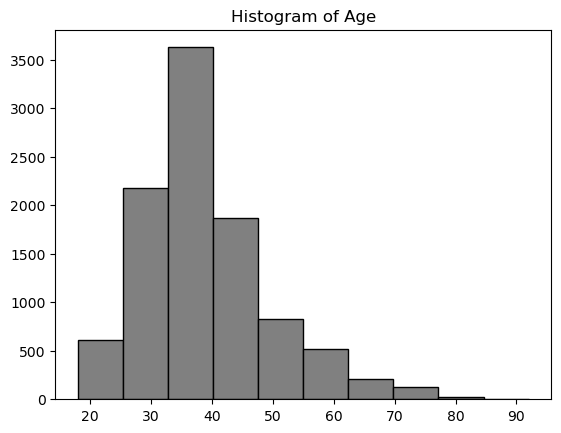

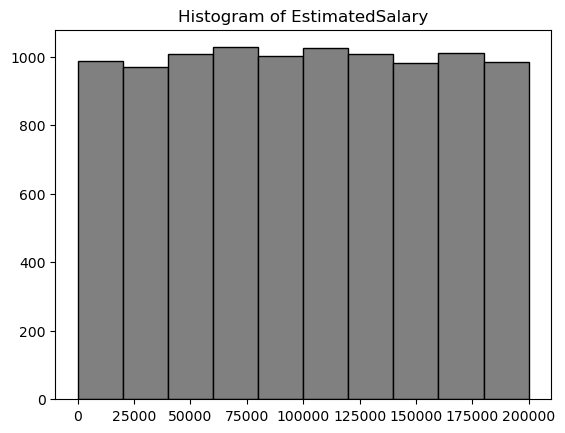

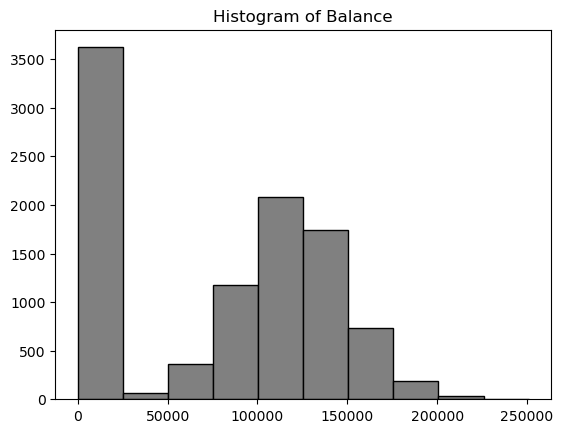

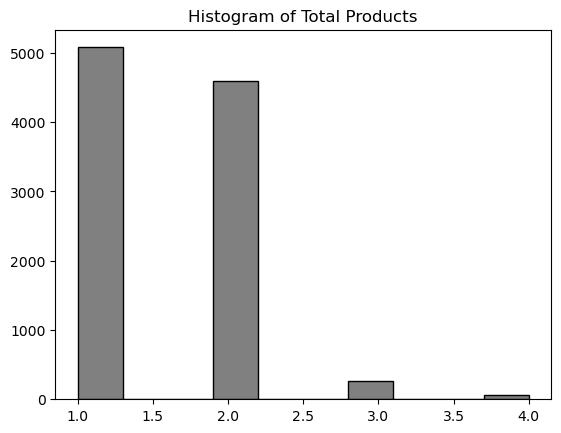

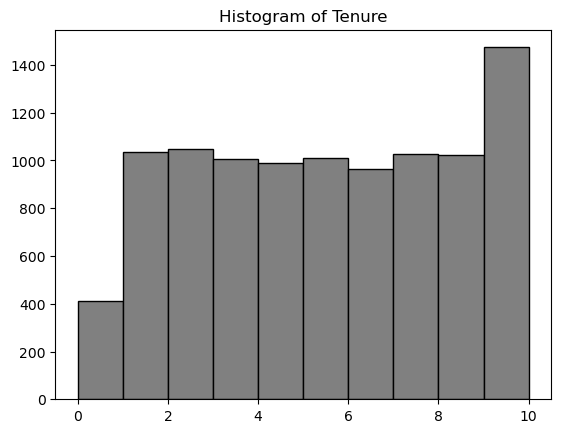

In [2192]:
# Density/Histogram plot of each numerical column

for columns in num_columns:
    plt.hist(bank_eng[columns],color='grey',edgecolor='black')
    plt.title(f'Histogram of {columns}')
    plt.show()

- Total Products,Balance,Age and CreditScore shows a distribution that is not uniform indicating there are outliers.
- CustomerId,EstimatedSalary and Tenure shows a distribution that is almost uniform indicating that the values might be equal.

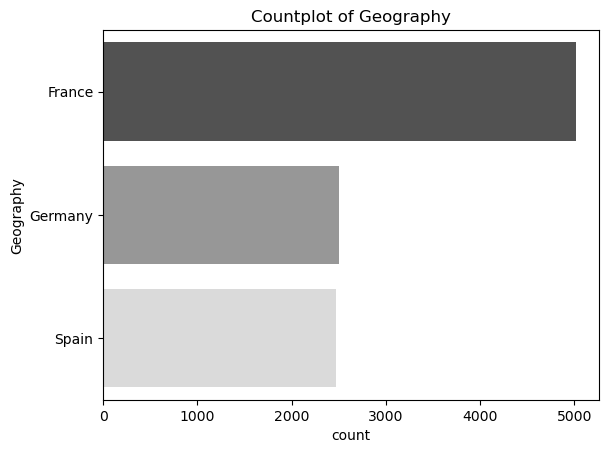

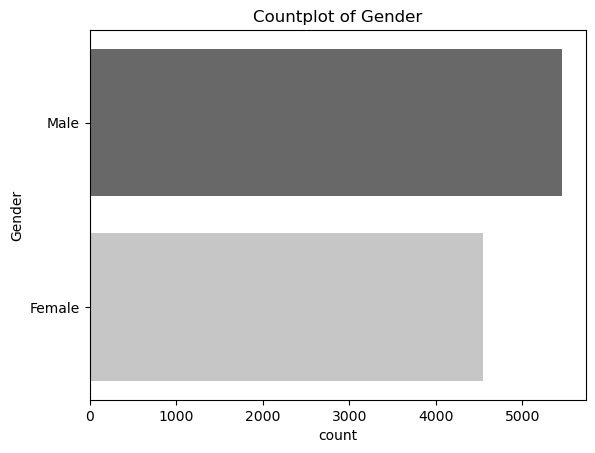

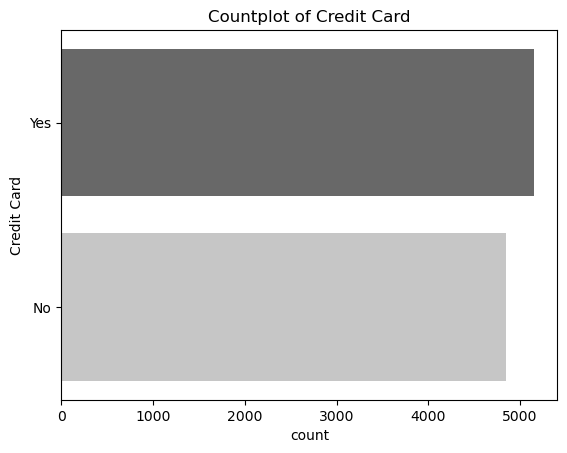

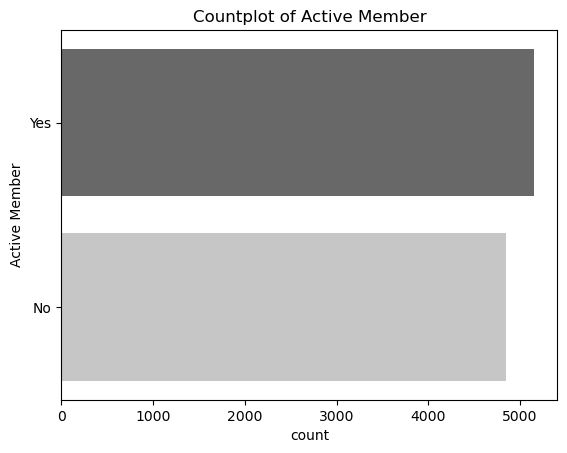

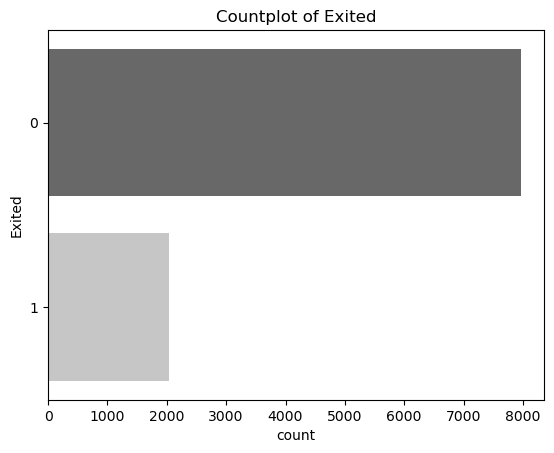

In [2194]:
# Distribution of values for categorical data

for columns in cat_columns:
    sorted_categories=bank_eng[columns].value_counts().index
    sb.countplot(y=columns, data=bank_eng, order=sorted_categories,palette='Greys_r')
    plt.title(f'Countplot of {columns}')
    plt.show()

- In Geography, the distribution shows that France has the highest value, then Germany and Spain has the same values.
- In Gender,the distribution shows that the male has the highest value than the female.
- Creditcard and Active Member distribution shows that values are equally likely.
- Exited show that the distribution of the retained customers are more than the exited customers.

In [2198]:
# Helper function for conversion of data type
def change_type(column: str,new_data_type:str,data):
    data[column]=data[column].astype(new_data_type)

In [2200]:
# Convert Exited data type to a string
change_type('Exited','str',bank_eng)

In [2202]:
# Change Exited rows to boolean value
bank_eng['Exited']=bank_eng['Exited'].str.replace('0','No').replace('1','Yes')

In [2204]:
bank_eng.head()

,CustomerId,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,Total Products,Credit Card,Tenure,Active Member,Exited
0,15634602,619,France,Female,42,101348.88,0.00,1,Yes,2,Yes,Yes
2,15647311,608,Spain,Female,41,112542.58,83807.86,1,Yes,1,Yes,No
3,15619304,502,France,Female,42,113931.57,159660.80,3,No,8,No,Yes
4,15701354,699,France,Female,39,93826.63,0.00,2,No,1,No,No
5,15737888,850,Spain,Female,43,79084.10,125510.82,1,Yes,2,Yes,No


### Data Preparation

In [2207]:
# Create a category for CreditScore and Age 

def categorize_credit_score(value):
    if value <= 550:
        return 'Poor'
    elif value >= 551 and value <= 650:
        return 'Fair'
    elif value >= 651 and value <= 750:
        return 'Good'
    elif value >= 751 and value <= 850:
        return 'Very Good'
    else:
        return 'Excellent'

def categorize_age(value):
    if value <= 18:
        return ' Teenager'
    elif value >= 18 and value <= 29:
        return 'Youth'
    elif value >= 30 and value <= 55:
        return ' Adult'
    else:
        return 'Old'


bank_eng['Credit Score Category'] = bank_eng['CreditScore'].apply(categorize_credit_score)
bank_eng['Age Category'] = bank_eng['Age'].apply(categorize_age)

In [2209]:
bank_eng.head()

,CustomerId,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,Total Products,Credit Card,Tenure,Active Member,Exited,Credit Score Category,Age Category
0,15634602,619,France,Female,42,101348.88,0.00,1,Yes,2,Yes,Yes,Fair,Adult
2,15647311,608,Spain,Female,41,112542.58,83807.86,1,Yes,1,Yes,No,Fair,Adult
3,15619304,502,France,Female,42,113931.57,159660.80,3,No,8,No,Yes,Poor,Adult
4,15701354,699,France,Female,39,93826.63,0.00,2,No,1,No,No,Good,Adult
5,15737888,850,Spain,Female,43,79084.10,125510.82,1,Yes,2,Yes,No,Very Good,Adult


### Data Analysis

In [2212]:
# helper function to generate plot

plt.figure(figsize=(20,10))

# generate a bar plot 

def generate_bar_plot(x,y,xlabel,ylabel):
    plt.bar(x,y, color='grey', edgecolor='black')
    plt.title(f'Plot of {ylabel} against {xlabel}')
    plt.xlabel(xlabel)
    plt.xlabel(ylabel)
    plt.show

# Generate a line chart

def generate_line_chart(x,y,xlabel,ylabel,data,color='grey',estimator=sum):
    sb.lineplot(x=x, y=y, markers=True, dashes=False, data=data, estimator=estimator, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Plot of {ylabel} with changes in {xlabel}')
    plt.show()

# Generate a plot pie 

def plot_pie(data,labels,title):
    plt.pie(data,labels=labels, autopct='%.0f%%')
    plt.title(f'{title}')
    plt.show()

<Figure size 2000x1000 with 0 Axes>


1. Demographic Analysis: The primary goal is to understand the distribution of customers by geography,gender and age

 - Analyze the distribution of customers based on country, gender, and age.
 - Identify any demographic segments (e.g., by country  or gender) that have a significantly different credit score, balance, or other financial metrics.


In [2215]:
bank_eng.head()

,CustomerId,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,Total Products,Credit Card,Tenure,Active Member,Exited,Credit Score Category,Age Category
0,15634602,619,France,Female,42,101348.88,0.00,1,Yes,2,Yes,Yes,Fair,Adult
2,15647311,608,Spain,Female,41,112542.58,83807.86,1,Yes,1,Yes,No,Fair,Adult
3,15619304,502,France,Female,42,113931.57,159660.80,3,No,8,No,Yes,Poor,Adult
4,15701354,699,France,Female,39,93826.63,0.00,2,No,1,No,No,Good,Adult
5,15737888,850,Spain,Female,43,79084.10,125510.82,1,Yes,2,Yes,No,Very Good,Adult


In [2217]:
# ANALYSIS OF CUSTOMERS DISTRIBUTION 

# Distribution of Customers by Geography

dist_geo= bank_eng.groupby('Geography')[['CustomerId']].count()
dist_geo

,CustomerId
Geography,
France,5013
Germany,2508
Spain,2476


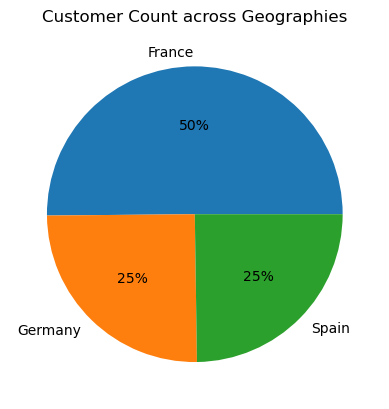

In [2219]:
plot_pie(dist_geo['CustomerId'], dist_geo.index, 'Customer Count across Geographies')

Result: From this distribution,(50%) of the customers are from France while (25%) are from Germany then (25%) from Spain.

In [2222]:
# Distribution of Customers by Gender
dist_gen= bank_eng.groupby('Gender')[['CustomerId']].count()
dist_gen

,CustomerId
Gender,
Female,4541
Male,5456


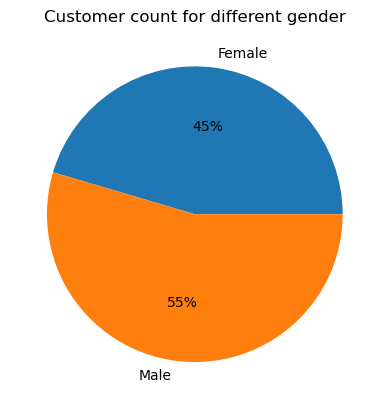

In [2224]:
plot_pie(dist_gen['CustomerId'], dist_gen.index, 'Customer count for different gender')

Result: This distribution shows that there are more male customers than the female. 

In [2227]:
# Distribution of customers by Age

dist_age=bank_eng.groupby('Age')[['CustomerId']].count()
dist_age


,CustomerId
Age,
18,22
19,27
20,40
21,53
22,84
...,...
83,1
84,2
85,1


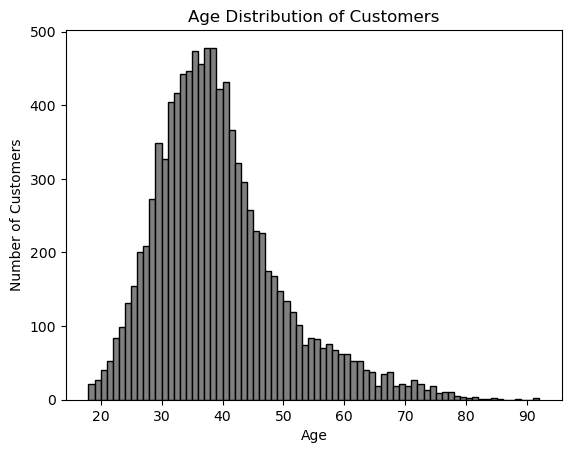

In [2229]:

plt.hist(bank_eng['Age'], bins=range(min(bank_eng['Age']), max(bank_eng['Age']) + 1, 1), color='grey',edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()


Result: This is a skewed distribution indicating that majority of customers are adult.

In [2232]:
bank_eng.head()

,CustomerId,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,Total Products,Credit Card,Tenure,Active Member,Exited,Credit Score Category,Age Category
0,15634602,619,France,Female,42,101348.88,0.00,1,Yes,2,Yes,Yes,Fair,Adult
2,15647311,608,Spain,Female,41,112542.58,83807.86,1,Yes,1,Yes,No,Fair,Adult
3,15619304,502,France,Female,42,113931.57,159660.80,3,No,8,No,Yes,Poor,Adult
4,15701354,699,France,Female,39,93826.63,0.00,2,No,1,No,No,Good,Adult
5,15737888,850,Spain,Female,43,79084.10,125510.82,1,Yes,2,Yes,No,Very Good,Adult


In [2234]:
# IDENTIFICATION OF DEMOGRAPHIC SEGMENT 

# Mean and standard deviation of Credit score by Gender
gen_sumy = bank_eng.groupby('Gender')['CreditScore'].agg(['mean', 'std', 'count'])
gen_sumy


,mean,std,count
Gender,,,
Female,650.873156,96.787456,4541
Male,650.272544,96.558021,5456


In [2236]:
# Descriptive Statistics by Geography and Gender
des_stat=bank_eng.groupby(['Geography', 'Gender'])[['CreditScore', 'Balance']].describe()
des_stat

CreditScore                                               \
                       count        mean        std    min     25%    50%   
Geography Gender                                                            
France    Female      2260.0  649.234956  97.474516  350.0  580.00  652.0   
          Male        2753.0  650.064657  96.649794  350.0  583.00  653.0   
Germany   Female      1192.0  653.160235  98.379534  351.0  587.75  651.0   
          Male        1316.0  649.966565  98.004557  350.0  581.00  650.5   
Spain     Female      1089.0  651.769513  93.571709  358.0  590.00  653.0   
          Male        1387.0  650.975487  95.047384  350.0  584.00  650.0   

                                Balance                               \
                     75%    max   count           mean           std   
Geography Gender                                                       
France    Female  716.00  850.0  2260.0   60349.361606  63577.945825   
          Male    717.00  850.0  2753.0   63546.284875  64562.683717   
Germany   Female  722.00  850.0  1192.0  119127.339404  26343.553755   
          Male    723.25  850.0  1316.0  120259.668222  27624.732304   
Spain     Female  713.00  850.0  1089.0   59862.092534  64280.969774   
          Male    716.00  850.0  1387.0   63311.852790  64186.302138   

                                                                           
                       min          25%        50%         75%        max  
Geography Gender                                                           
France    Female      0.00       0.0000   47710.66  119016.215  238387.56  
          Male        0.00       0.0000   69413.44  122806.950  212692.97  
Germany   Female  32197.64  102284.6475  118902.35  137261.040  206868.78  
          Male    27288.43  103397.7475  120120.49  137815.070  214346.96  
Spain     Female      0.00       0.0000       0.00  119799.270  216109.88  
          Male        0.00       0.0000   69608.14  121350.935  250898.09

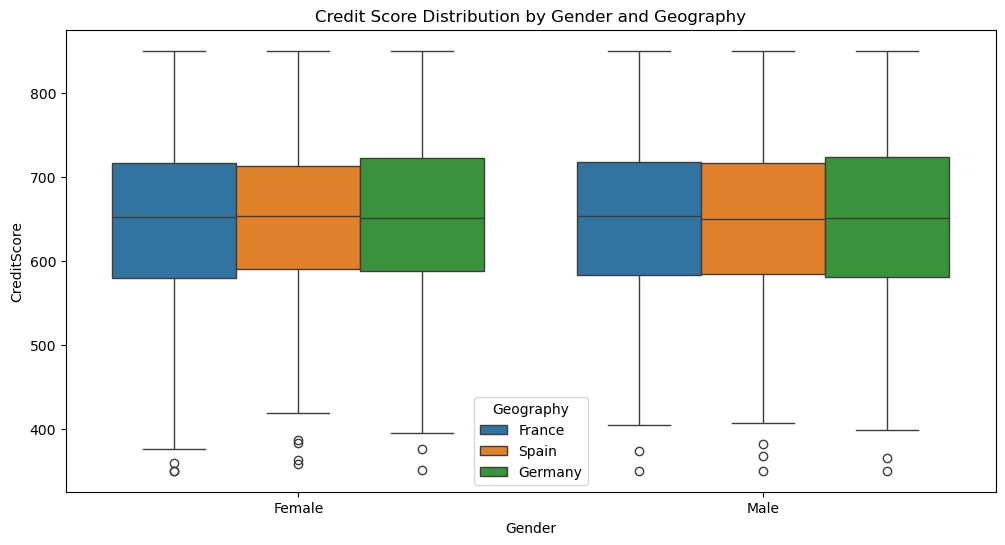

In [2238]:
# Boxplot for Credit Score Distribution by Gender and Geography
plt.figure(figsize=(12,6))
sb.boxplot(x='Gender', y='CreditScore', hue='Geography', data=bank_eng)
plt.title('Credit Score Distribution by Gender and Geography')
plt.show()

Result: According to the distribution in Germany,females have slightly higher average credit score than the males credit scores while in Spain and France the distribution shows that both genders credit scores is equally likely.

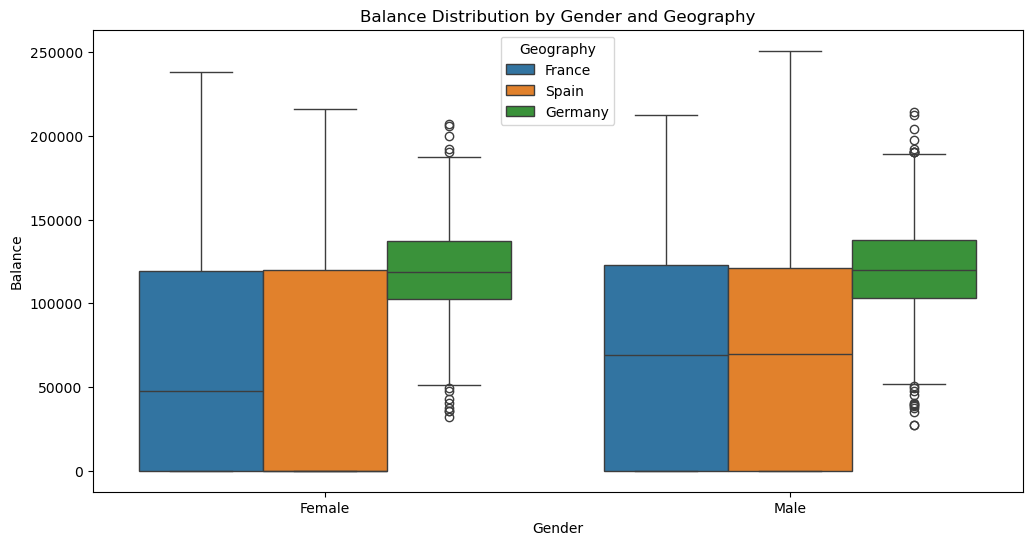

In [2241]:
# Boxplot for Balance Distribution by Gender and Geography
plt.figure(figsize=(12,6))
sb.boxplot(x='Gender', y='Balance', hue='Geography', data=bank_eng)
plt.title('Balance Distribution by Gender and Geography')
plt.show()


Result: In Germany,both females and males have higher balance, while Spain and France, both genders have lower balances; the range  distribution is equal.

In [2244]:
# Hypothesis Testing
# Function to perform t-test for credit scores and balances by gender within each geography

def perform_t_test(bank_eng, geography):
    males = bank_eng[(bank_eng['Geography'] == geography) & (bank_eng['Gender'] == 'Male')]
    females = bank_eng[(bank_eng['Geography'] == geography) & (bank_eng['Gender'] == 'Female')] 

    print(f"\n--- Hypothesis Testing for {geography.title()} ---")

    # Credit Score
    if len(males) > 0 and len(females) >0:
       t_stat_score, p_value_score = stats.ttest_ind(males['CreditScore'], females['CreditScore'])
       print(f"Credit Score t-statistic: {t_stat_score:.4f}, p-value: {p_value_score:.4f}")
    else:
       print("Insufficient data for t-test on Credit Score.")

    # Balance
    if len(males) > 0 and len (females) > 0:
       t_stat_balance, p_value_balance = stats.ttest_ind(males['Balance'], females['Balance'])
       print(f"Balance t-statistic: {t_stat_balance:.4f}, p-value: {p_value_balance:.4f}")
    else:
       print("Insufficient data for t-test on Balance.")

# Apply the t-test function for each country
for geography in bank_eng['Geography'].unique():
    perform_t_test(bank_eng, geography)


--- Hypothesis Testing for France ---
Credit Score t-statistic: 0.3013, p-value: 0.7632
Balance t-statistic: 1.7565, p-value: 0.0791

--- Hypothesis Testing for Spain ---
Credit Score t-statistic: -0.2077, p-value: 0.8354
Balance t-statistic: 1.3266, p-value: 0.1848

--- Hypothesis Testing for Germany ---
Credit Score t-statistic: -0.8135, p-value: 0.4160
Balance t-statistic: 1.0479, p-value: 0.2948


There are no significant difference 

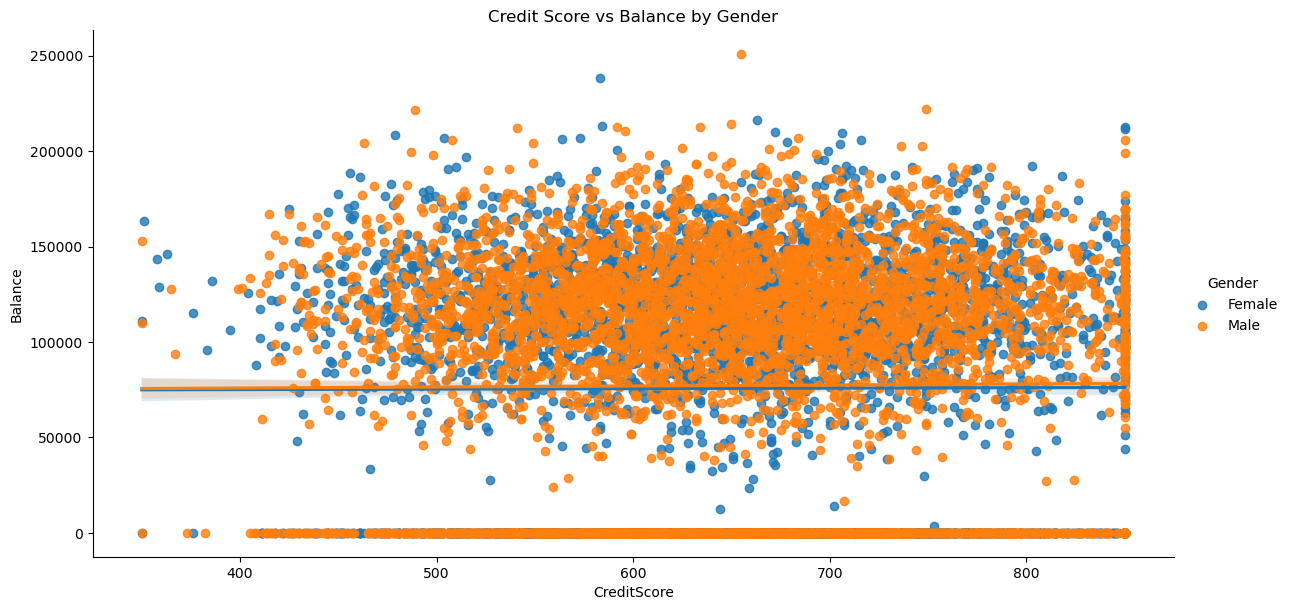

In [2247]:
# Correlation between Credit Score and Balance for each Gender
sb.lmplot(data=bank_eng, x='CreditScore', y='Balance', hue='Gender', aspect=2, height=6)
plt.title('Credit Score vs Balance by Gender')
plt.show()


Result: The analysis between Credit Score and Balance reveals a similar relationship across genders.
Both men and women exhibit a positive correlation between credit score and balance,
with individuals holding higher balances tending to have higher credit scores. 
There is no significant difference in the strength or nature of this relationship between genders.

2. Customer Engagement Patterns: This refer to the behaviors,interactions and tendencies displayed by customers as they engage with the company's products and services across various channels.

     In this part, we examine how customer tenure correlates with engagement metrics such as number of products, credit card ownership, and active membership.
     
 - Investigate the relationship between customer tenure and engagement (such as the number of products owned, credit card, and active member). - 
Analyze the impact of tenure on customer behavior, especially focusing on long-term customer patterns (e.g., do longer-tenured customers tend to hold more products or have higher balance?)


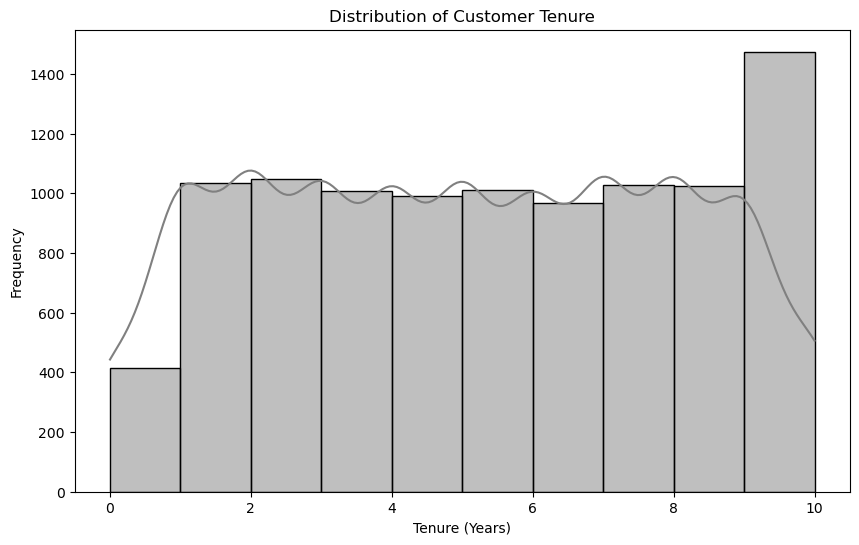

In [2251]:
# Investigating the relationship between Tenure and Total Products
# Exploratory Data Analysis(EDA)

# Check the distribution of customer tenure

plt.figure(figsize=(10,6))
sb.histplot(bank_eng['Tenure'], bins=10, kde=True,color='grey')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()

Result: This distribution shows that the highest number of customers have been with the bank for 10 years, while the other customers have been with the bank for 1-9 years are more uniformly distributed and slightly equal.

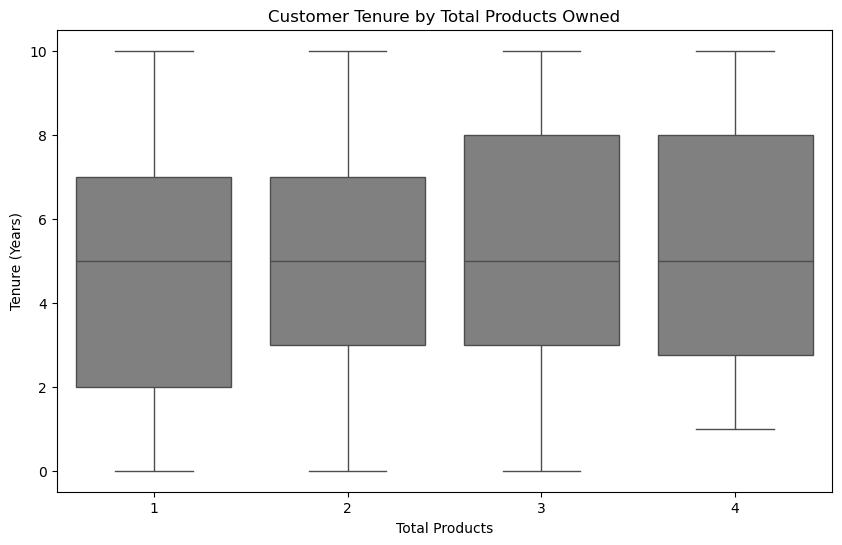

In [2254]:
# Relationship between tenure and total products

plt.figure(figsize=(10,6))
sb.boxplot(x='Total Products', y='Tenure',data=bank_eng,color='grey')
plt.title('Customer Tenure by Total Products Owned')
plt.xlabel('Total Products')
plt.ylabel('Tenure (Years)')
plt.show()

Result: This distribution shows that customers with 3 or 4 products represent the largest group over the past six years, while those with fewer than 3 products make up the smallest group.



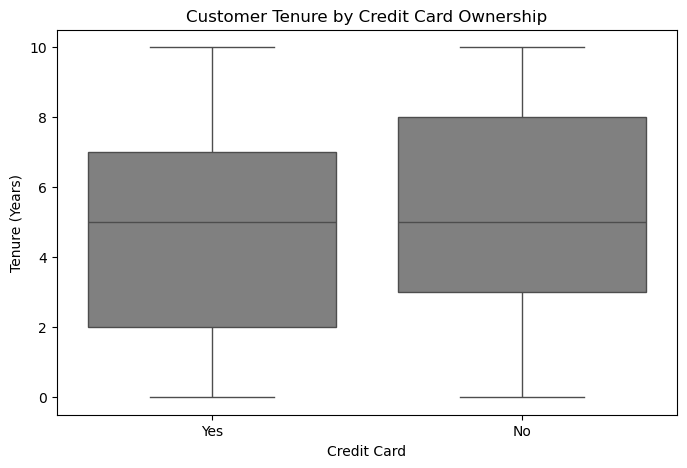

In [2257]:
# Relationship between tenure and credit card ownership

plt.figure(figsize=(8,5))
sb.boxplot(x='Credit Card', y='Tenure', data=bank_eng,color='grey')
plt.title('Customer Tenure by Credit Card Ownership')
plt.xlabel('Credit Card')
plt.ylabel('Tenure (Years)')
plt.show()

Result: This distribution shows that the majority of customers who have been with the bank for more than seven years do not have a credit card, while those who have been with the bank for less than seven years are more likely to have a credit card.

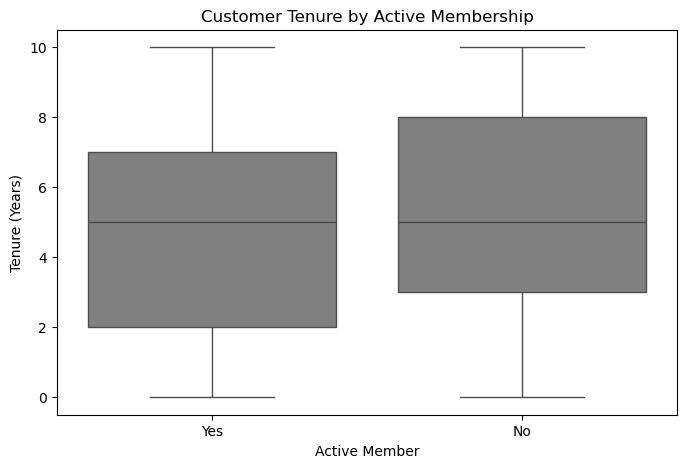

In [2260]:
# Relationship between tenure and active membership

plt.figure(figsize=(8,5))
sb.boxplot(x='Active Member', y='Tenure', data=bank_eng,color='grey')
plt.title('Customer Tenure by Active Membership')
plt.xlabel('Active Member')
plt.ylabel('Tenure (Years)')
plt.show()

Result: This distribution demonstrates that, for more than six years, the number of inactive members has consistently exceeded the number of active members


In [2263]:
# Hypothesis Testing
# Test if there is a significant difference in tenure for customers with vs without a credit card 

t_stat, p_value = stats.ttest_ind(bank_eng[bank_eng['Credit Card'] == 'Yes']['Tenure'],
                                  bank_eng[bank_eng['Credit Card'] == 'No']['Tenure'])
print(f"T-test for Credit Card Ownership and Tenure: t-stat={t_stat:.4f}, p-value={p_value:.4f}")

# Test if there is a significant difference in tenure for active vs inactive members
t_stat, p_value = stats.ttest_ind(bank_eng[bank_eng['Active Member'] == 'Yes']['Tenure'],
                                 bank_eng[bank_eng['Active Member'] == 'No']['Tenure'])
print(f"T-test for Active Membership and Tenure: t-stat={t_stat:.4f}, p-values={p_value:.4f}")

T-test for Credit Card Ownership and Tenure: t-stat=-2.8169, p-value=0.0049
T-test for Active Membership and Tenure: t-stat=-2.8169, p-values=0.0049


Result: There is a significant difference between tenure and customers with vs without credit card.
        There is also a significant difference between tenure and active vs inactive members.

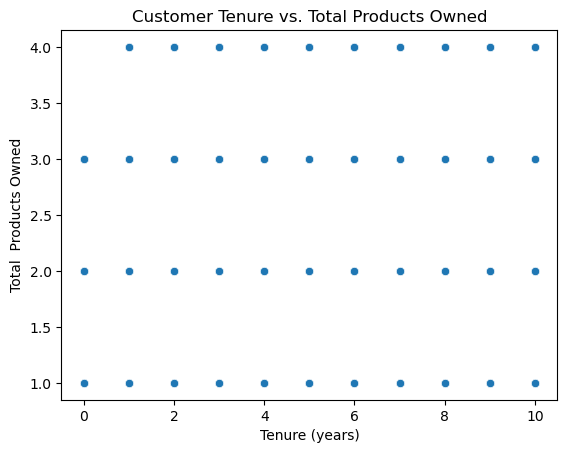

In [2266]:
# Scatter plot to visualize relationship between Tenure and Number of Products Owned
sb.scatterplot(x='Tenure', y='Total Products', data=bank_eng)
plt.title('Customer Tenure vs. Total Products Owned')
plt.xlabel('Tenure (years)')
plt.ylabel('Total  Products Owned')
plt.show()

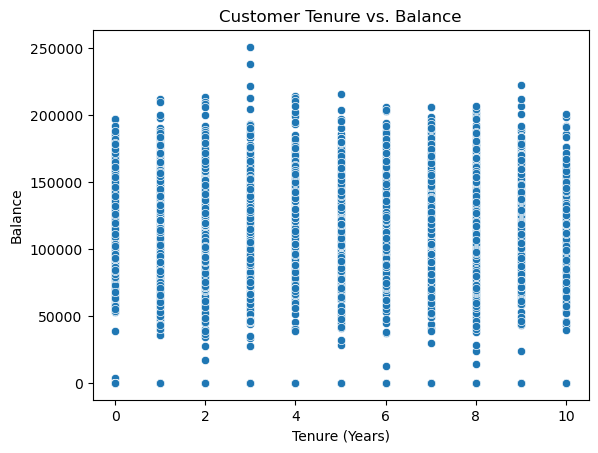

In [2268]:
# Scatter plot to visualize relationship between Tenure and Balance
sb.scatterplot(x='Tenure', y='Balance', data=bank_eng)
plt.title('Customer Tenure vs. Balance')
plt.xlabel('Tenure (Years)')
plt.ylabel('Balance')
plt.show()

Tenure Group
0-1 years     1.489855
1-3 years     1.562530
3-5 years     1.535732
5-10 years    1.530603
Name: Total Products, dtype: float64


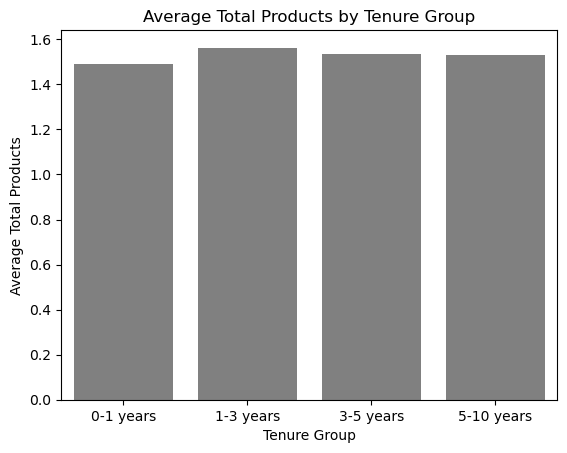

In [2270]:
# Create tenure segments 
tenure_bins = [0, 1, 3, 5, 10]
tenure_labels = ['0-1 years', '1-3 years', '3-5 years', '5-10 years']
bank_eng['Tenure Group'] = pd.cut(bank_eng['Tenure'], bins=tenure_bins, labels=tenure_labels)

# Analyze the average number of products per tenure group
tenure_product_avg = bank_eng.groupby('Tenure Group')['Total Products'].mean()
print(tenure_product_avg)

# Visualize average number of products across tenure segments
sb.barplot(x=tenure_product_avg.index, y=tenure_product_avg.values,color='grey')
plt.title('Average Total Products by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Average Total Products')
plt.show()


Result: This distribution indicates that short-term customers have more products than long-term customers.

Tenure Group
0-1 years     78555.384222
1-3 years     77252.385173
3-5 years     75265.543708
5-10 years    75883.047581
Name: Balance, dtype: float64


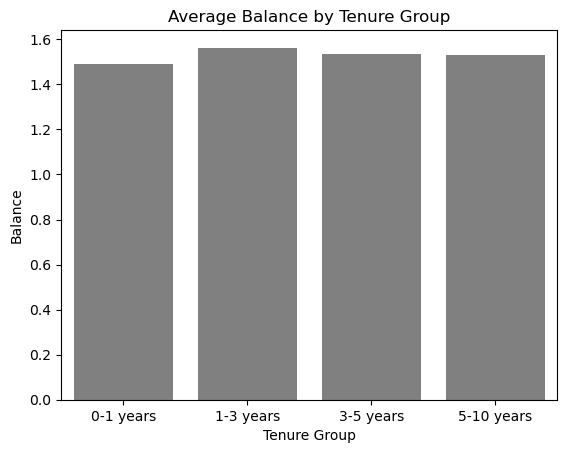

In [2273]:
# Create tenure segments 
tenure_bins = [0, 1, 3, 5, 10]
tenure_labels = ['0-1 years', '1-3 years', '3-5 years', '5-10 years']
bank_eng['Tenure Group'] = pd.cut(bank_eng['Tenure'], bins=tenure_bins, labels=tenure_labels)

# Analyze the average number of products per tenure group
tenure_balance_avg = bank_eng.groupby('Tenure Group')['Balance'].mean()
print(tenure_balance_avg)

# Visualize average number of products across tenure segments
sb.barplot(x=tenure_product_avg.index, y=tenure_product_avg.values,color='grey')
plt.title('Average Balance by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Balance')
plt.show()


Result: This distribution indicates that short-term customers have higher balance than long-term customers.

3. Financial Performance:  - 
Explore credit score distribution and identify which customer segments (e.g., age, gender, geography
     tend to have higher or lower credit scores.  - 
Analyze customer balance and estimated salary patterns and compare them across different demographic groups.


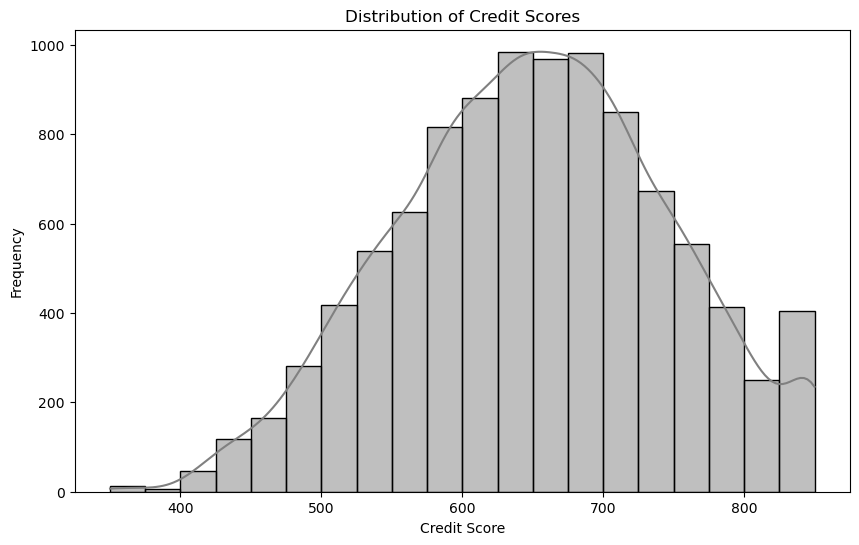

In [2277]:
# Plot overall distribution of credit scores
plt.figure(figsize=(10,6))
sb.histplot(bank_eng['CreditScore'], bins=20, kde=True, color='grey')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

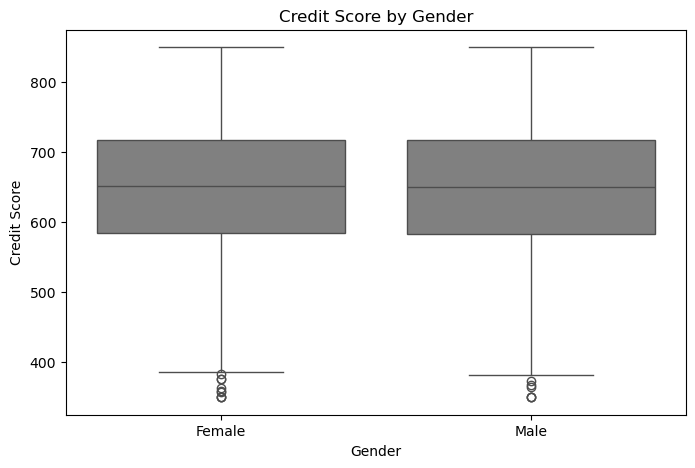

In [2279]:
# Boxplot of Credit Score by Gender

plt.figure(figsize=(8,5))
sb.boxplot(x='Gender', y='CreditScore', data=bank_eng,color='grey')
plt.title('Credit Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Credit Score')
plt.show()

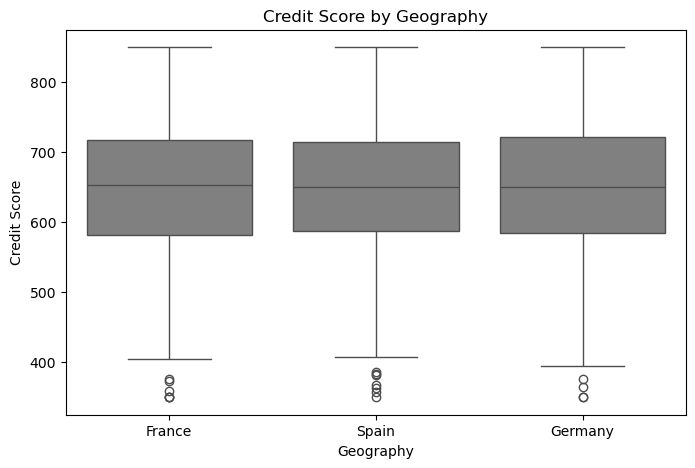

In [2281]:
# Boxplot of Credit Score by Geography

plt.figure(figsize=(8,5))
sb.boxplot(x='Geography', y='CreditScore', data=bank_eng,color='grey')
plt.title('Credit Score by Geography')
plt.xlabel('Geography')
plt.ylabel('Credit Score')
plt.show()

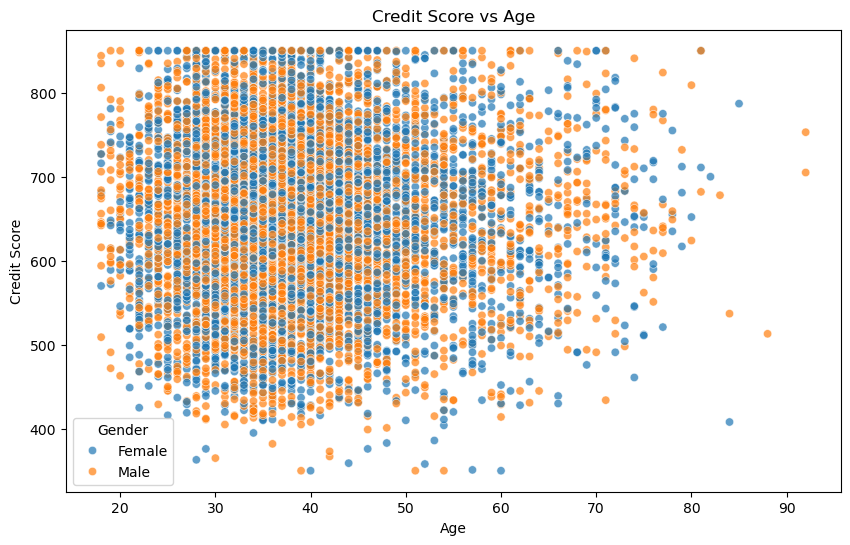

In [2283]:
# Scatter plot of Credit Score vs Age

plt.figure(figsize=(10,6))
sb.scatterplot(x='Age', y='CreditScore', data=bank_eng, hue='Gender', alpha=0.7,color='grey')
plt.title('Credit Score vs Age')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()

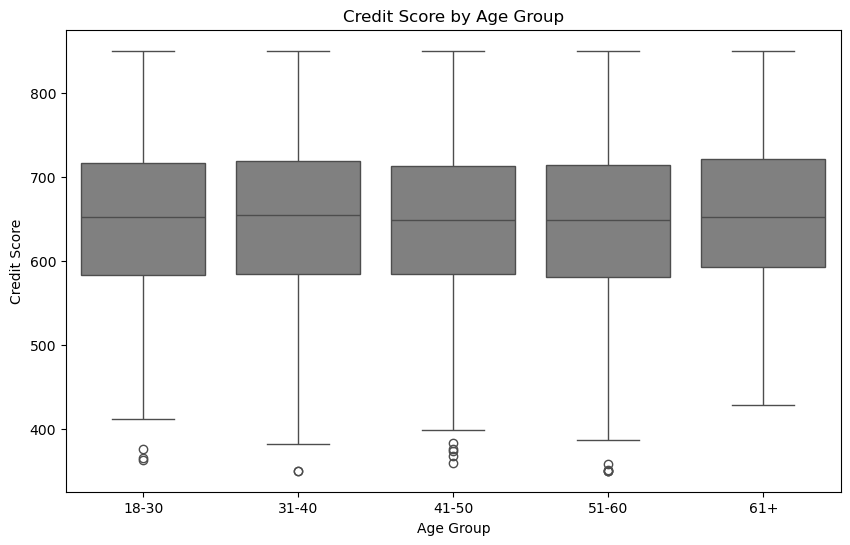

In [2284]:
# Create age bins
bins = [18, 30, 40, 50, 60, 80]
labels = ['18-30', '31-40', '41-50', '51-60','61+']
bank_eng['Age_Group'] = pd.cut(bank_eng['Age'], bins=bins, labels=labels)

# Boxplot of Credit Score by Age Group
plt.figure(figsize=(10,6))
sb.boxplot(x='Age_Group', y='CreditScore',data=bank_eng,color='grey')
plt.title('Credit Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Credit Score')
plt.show()

In [2287]:
# T-test to compare credit scores between males and females
t_stat, p_value = stats.ttest_ind(
    bank_eng[bank_eng['Gender'] == 'Male']['CreditScore'],
    bank_eng[bank_eng['Gender'] == 'Female']['CreditScore']
)
print(f"T-test for Credit Score by Gender: t-stat={t_stat:.4f}, p-value={p_value:.4f}")
# Interpretation: If p-value < 0.05,there's a significant difference between genders.

T-test for Credit Score by Gender: t-stat=-0.3093, p-value=0.7571


Result: In summary,exploring the distribution of credit scores across age, gender, and geography reveals no significant differences.The distributions appear to be fairly consistent and likely equal across these factors.

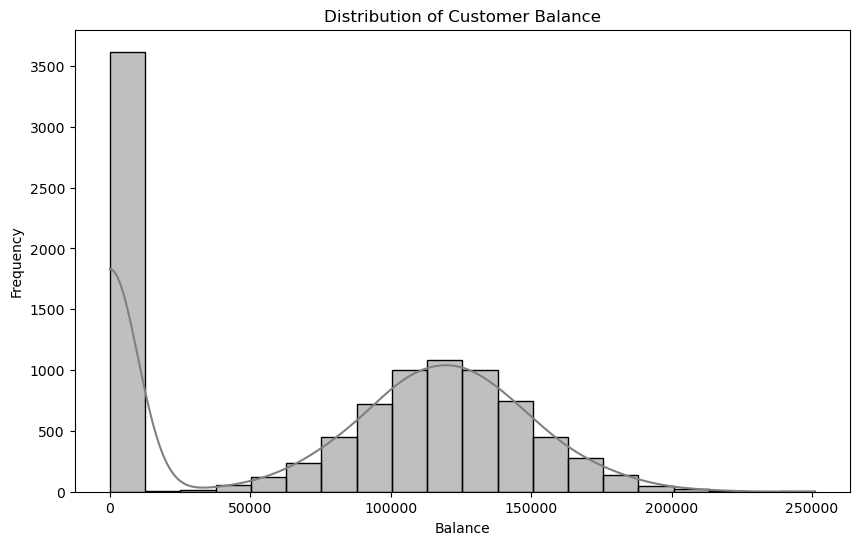

In [2290]:
# Overall Distribution of Balance

plt.figure(figsize=(10,6))
sb.histplot(bank_eng['Balance'], bins=20, kde=True, color='grey')
plt.title('Distribution of Customer Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

Result:The overall distribution of balances is right-skewed, indicating the presence of outliers with higher values.

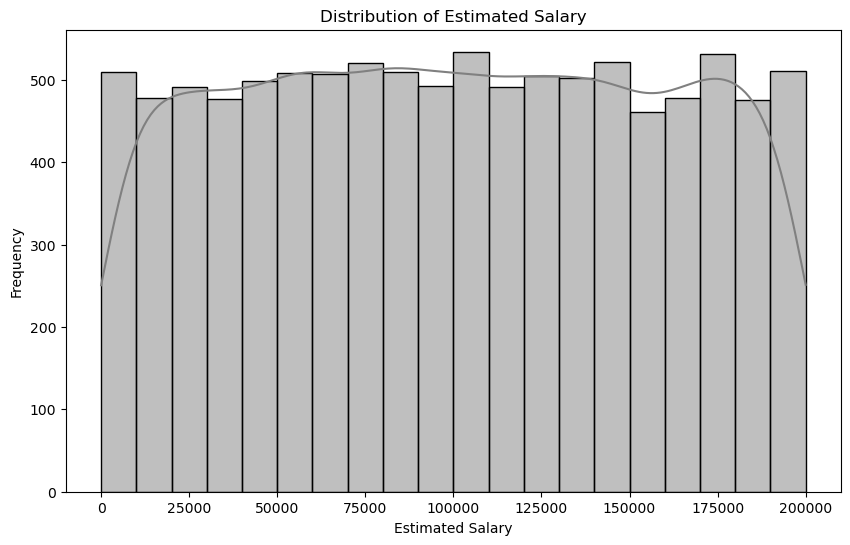

In [2293]:
# Overall Distribution of Estimated Salary

plt.figure(figsize=(10,6))
sb.histplot(bank_eng['EstimatedSalary'], bins=20, kde=True, color='grey')
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

Result: The overall distribution of estimated salaries is nearly uniform, suggesting that all salary values are equally likely.

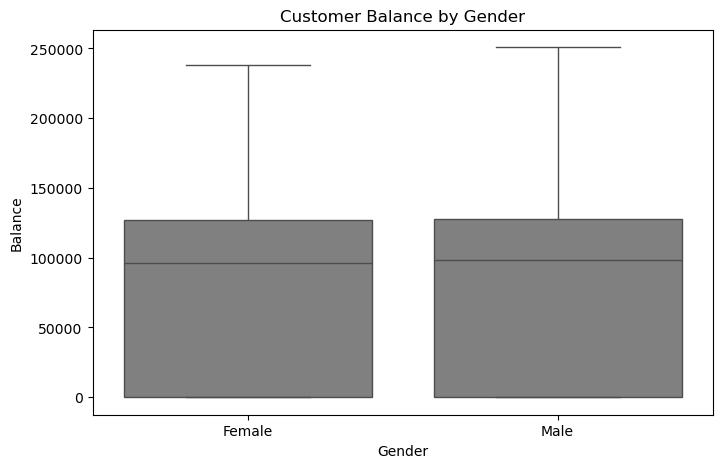

In [2296]:
# Boxplot of Balance by Gender
plt.figure(figsize=(8,5))
sb.boxplot(x='Gender', y='Balance',data=bank_eng,color='grey')
plt.title('Customer Balance by Gender')
plt.xlabel('Gender')
plt.ylabel('Balance')
plt.show()

Result: This distribution indicates that both genders have an equal balance.

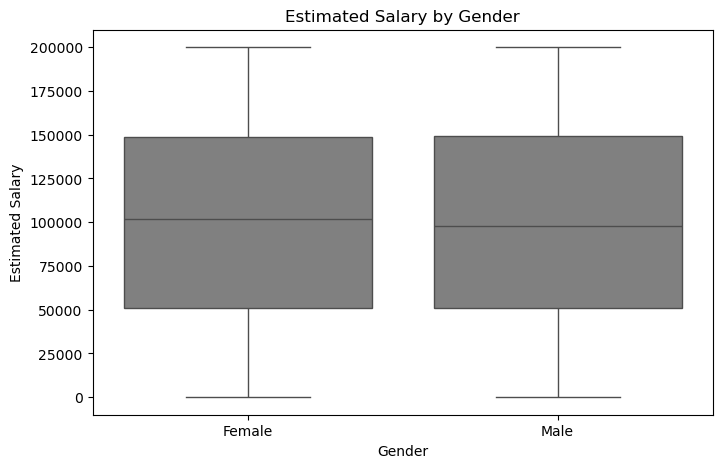

In [2299]:
# Boxplot of Estimated Salary by Gender
plt.figure(figsize=(8,5))
sb.boxplot(x='Gender', y='EstimatedSalary',data=bank_eng,color='grey')
plt.title('Estimated Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Estimated Salary')
plt.show()

Result: This distribution indicates that both genders have an equal estimated salaries.

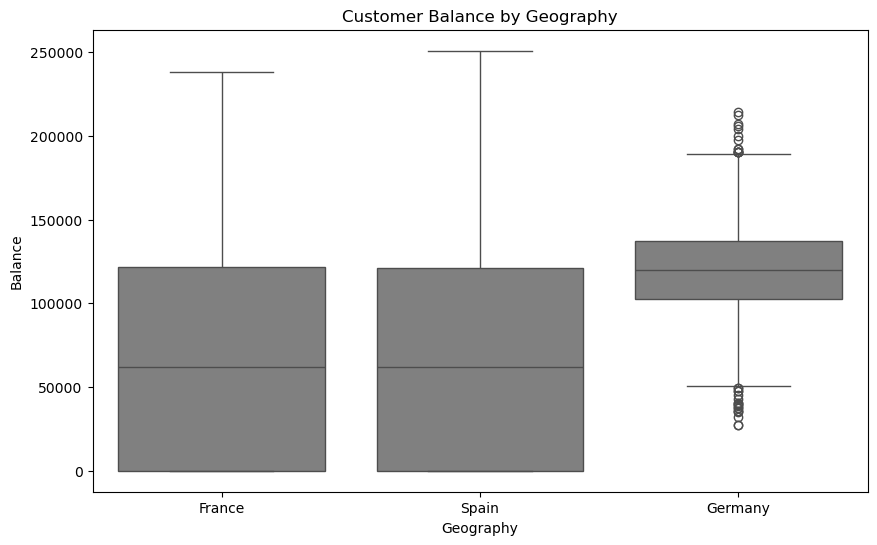

In [2302]:
# Boxplot of Balance by Geography
plt.figure(figsize=(10,6))
sb.boxplot(x='Geography', y='Balance',data=bank_eng,color='grey')
plt.title('Customer Balance by Geography')
plt.xlabel('Geography')
plt.ylabel('Balance')
plt.show()

Result: This distribution shows that Germany has a higher balance than both Spain and France,
while Spain and France have similar balances.

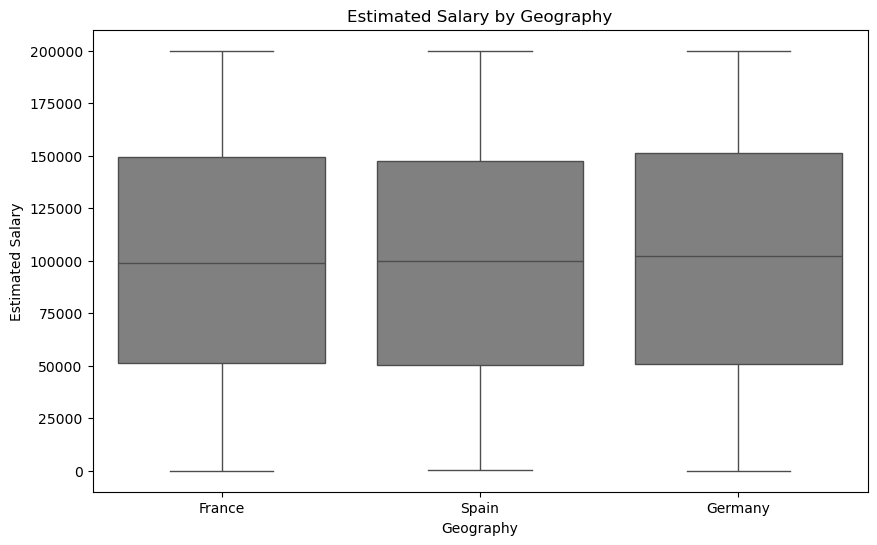

In [2305]:
# Boxplot of Estimated Salary by Gography
plt.figure(figsize=(10,6))
sb.boxplot(x='Geography', y='EstimatedSalary',data=bank_eng,color='grey')
plt.title('Estimated Salary by Geography')
plt.xlabel('Geography')
plt.ylabel('Estimated Salary')
plt.show()

Result: This distribution shows that Germany has slightly high estimated salary than both Spain and France, while Spain and France have similar estimated salary.

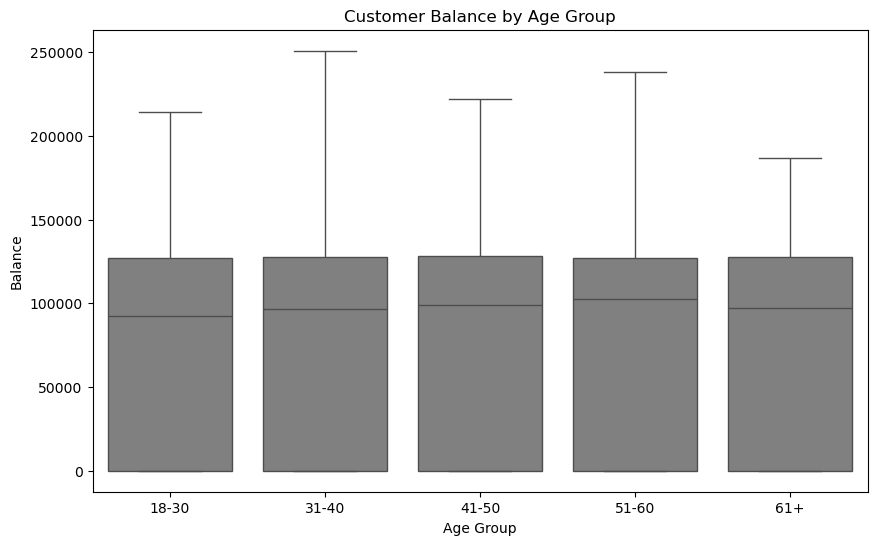

In [2308]:
# Balance and Estimated Salary by Age Groups
# Create age bins

bins = [18, 30, 40, 50, 60, 80]
labels = ['18-30', '31-40', '41-50', '51-60','61+']
bank_eng['Age_Group'] = pd.cut(bank_eng['Age'], bins=bins, labels=labels)

# Boxplot of Balance by Age Group
plt.figure(figsize=(10,6))
sb.boxplot(x='Age_Group', y='Balance',data=bank_eng,color='grey')
plt.title('Customer Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Balance')
plt.show()

Result: This distribution indicates that the balance across age groups is uniform.

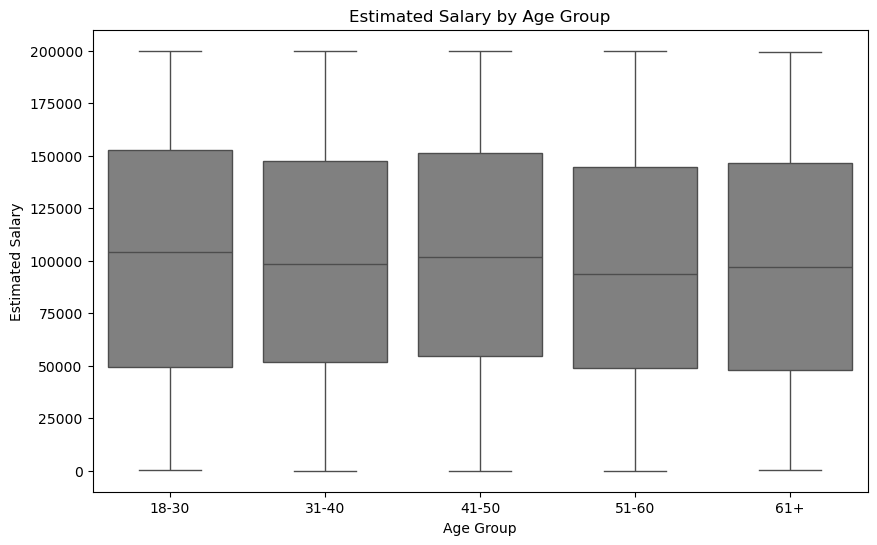

In [2311]:
# Boxplot of Estimated Salary by Age Group 

plt.figure(figsize=(10,6))
sb.boxplot(x='Age_Group', y='EstimatedSalary',data=bank_eng,color='grey')
plt.title('Estimated Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Estimated Salary')
plt.show()

Result: This distribution of estimated salaries by age group is nearly uniform, suggesting that all salary values by age are equally likely.

In [2314]:
# T-test to compare balance between males and females
t_stat_balance, p_value_balance = stats.ttest_ind(
    bank_eng[bank_eng['Gender'] == 'Male']['Balance'],
    bank_eng[bank_eng['Gender'] == 'Female']['Balance']
)
print(f"T-test for Balance by Gender: t-stat={t_stat_balance:.4f}, p-value={p_value_balance:.4f}")

# T-test to compare estimated salaries between males and females
t_stat_salary, p_value_salary = stats.ttest_ind(
    bank_eng[bank_eng['Gender'] == 'Male']['EstimatedSalary'],
    bank_eng[bank_eng['Gender'] == 'Female']['EstimatedSalary']
)
print(f"T-test for Estimated Salary by Gender: t-stat={t_stat_salary:.4f}, p-value={p_value_salary:.4f}")

# Interpretation: If p-value < 0.05,there's a significant difference between genders.

T-test for Balance by Gender: t-stat=1.2004, p-value=0.2300
T-test for Estimated Salary by Gender: t-stat=-0.8150, p-value=0.4151


4. Exited Customers Analysis:

(a) Compare the financial and demographic characteristics of customers who exited the bank versus those who remain active.
      .(b) 
Identify possible factors (e.g., age, credit score, balance) associated with customers exiting t bank.
.


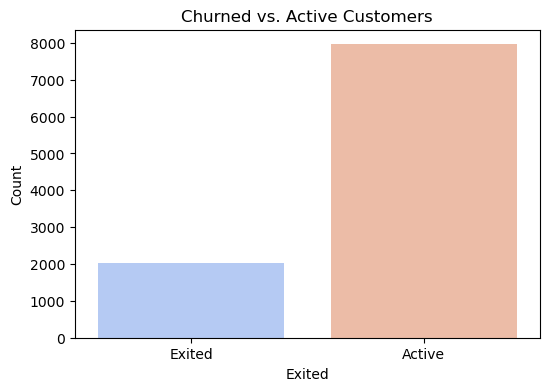

In [2317]:
# Distribution of Churned vs. Active Customers

# Count plot for exited vs active customers

plt.figure(figsize=(6,4))
sb.countplot(x='Exited', data=bank_eng,palette='coolwarm')
plt.title('Churned vs. Active Customers')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks(['No','Yes'],['Active','Exited'])
plt.show()

Result: This distribution shows that the retained customers are more than the exited customers.

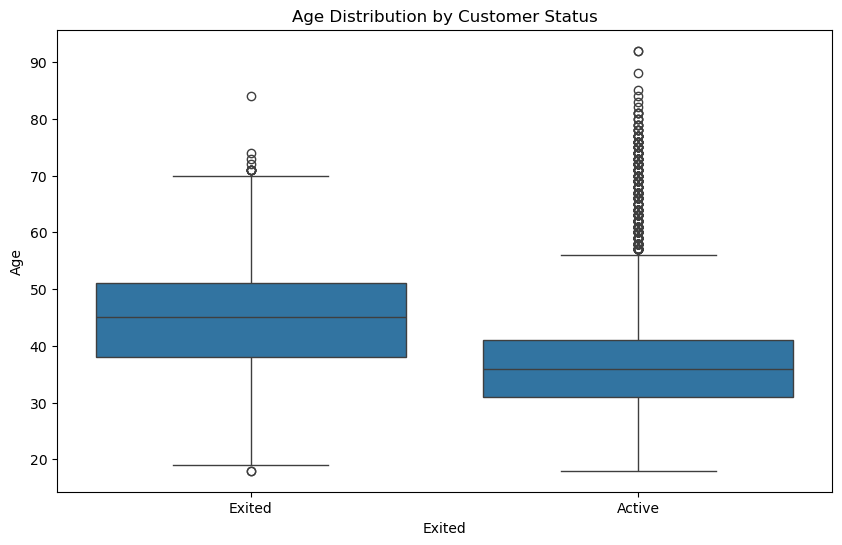

In [2320]:
# Demographic Characteristics(Age,Gender and Geography)

# Distribution of Age for churned vs active customers

plt.figure(figsize=(10,6))
sb.boxplot(x='Exited', y='Age',data=bank_eng,)
plt.title('Age Distribution by Customer Status')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.xticks(['No','Yes'],['Active','Exited'])
plt.show()


Result: This distribution shows that the age group classified as adults has a higher number of exited customers than active customers.

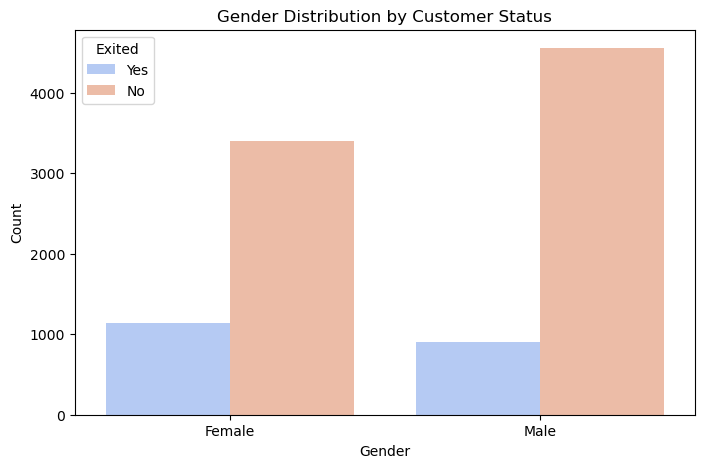

In [2323]:
# Count plot for gender

plt.figure(figsize=(8,5))
sb.countplot(x='Gender', hue='Exited',data=bank_eng,palette='coolwarm')
plt.title('Gender Distribution by Customer Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Result: This distribution shows that males make up the highest number of active customers, as well as the lowest number of exited customers,then the females have the highest number of the exited customers.

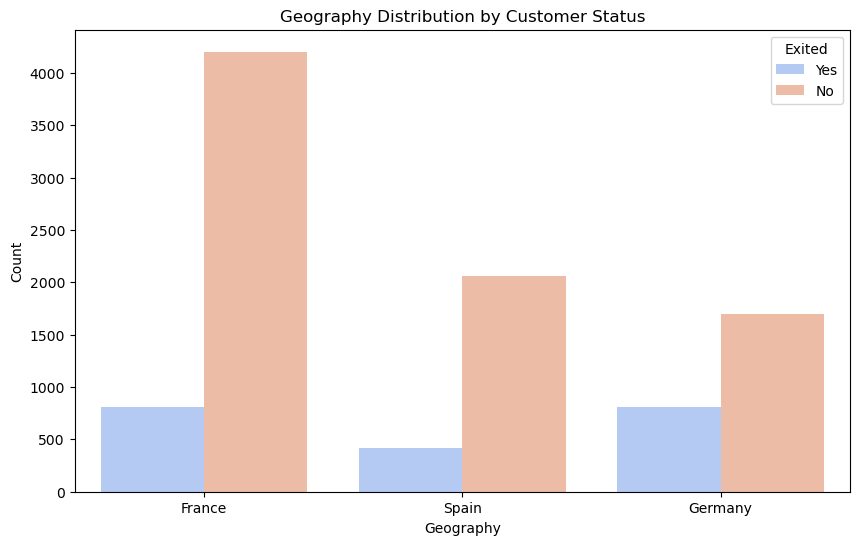

In [2326]:
# Count plot for Geography

plt.figure(figsize=(10,6))
sb.countplot(x='Geography', hue='Exited',data=bank_eng,palette='coolwarm')
plt.title('Geography Distribution by Customer Status')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

Result: This distribution shows that France has the highest number of active customers, while Germany has the lowest.
It also indicates that France and Germany have the same number of exited customers, with Spain having the fewest exited customers.

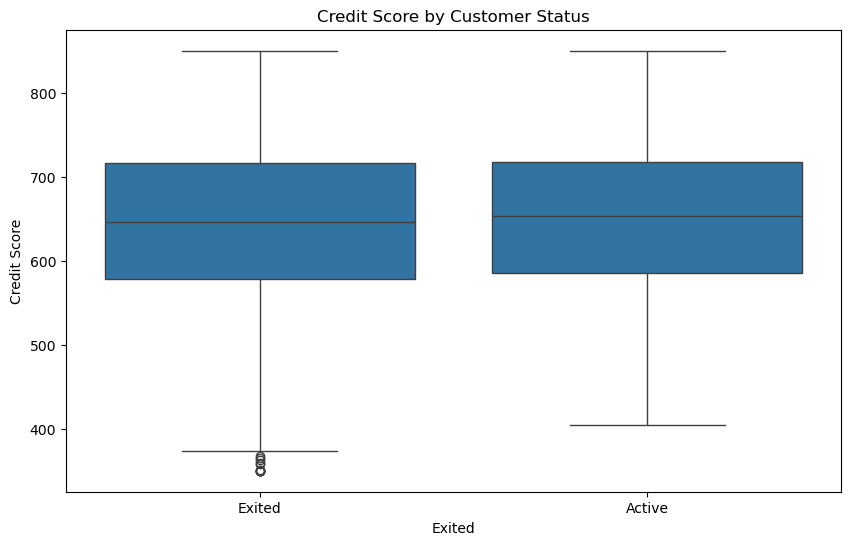

In [2329]:
# Financial Characteristics(Credit Score,Balance,Salary):

# Boxplot of Credit Score by customer status

plt.figure(figsize=(10,6))
sb.boxplot(x='Exited', y='CreditScore',data=bank_eng,)
plt.title('Credit Score by Customer Status')
plt.xlabel('Exited')
plt.ylabel('Credit Score')
plt.xticks(['No','Yes'],['Active','Exited'])
plt.show()

Result: This distribution of credit score by customer status indicate that the values are equal.

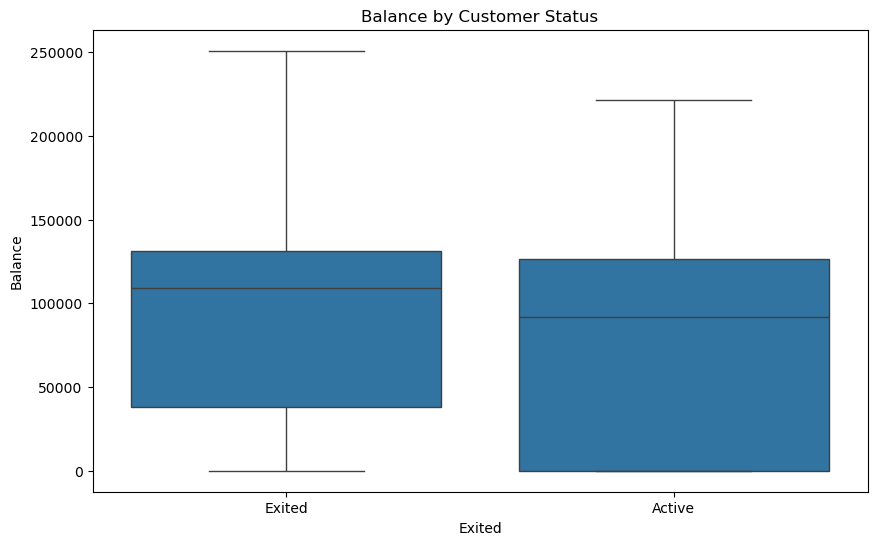

In [2332]:
# Boxplot of Balance by customer status

plt.figure(figsize=(10,6))
sb.boxplot(x='Exited', y='Balance',data=bank_eng,)
plt.title('Balance by Customer Status')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.xticks(['No','Yes'],['Active','Exited'])
plt.show()

Result: This distribution shows that the balance of the exited customers is slightly higher than active customer's balance.

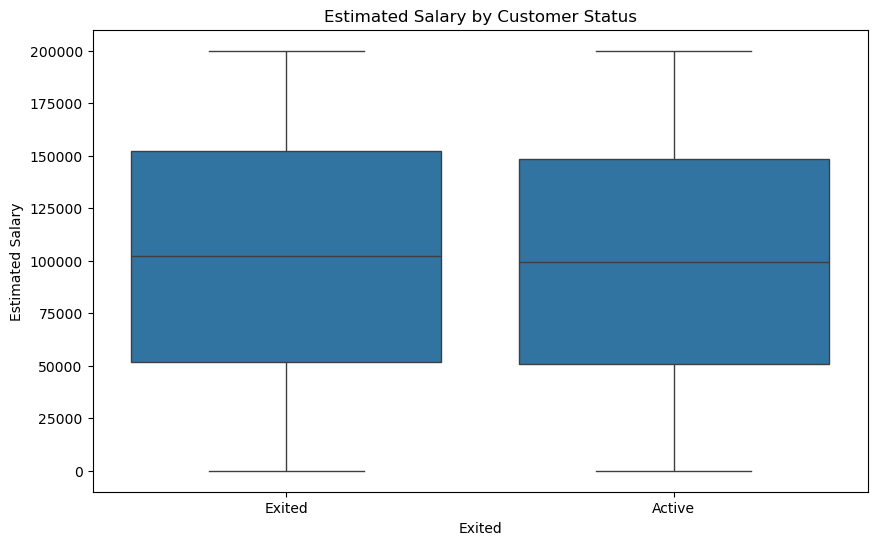

In [2335]:
# Boxplot of Estimated Salary by customer status

plt.figure(figsize=(10,6))
sb.boxplot(x='Exited', y='EstimatedSalary',data=bank_eng,)
plt.title('Estimated Salary by Customer Status')
plt.xlabel('Exited')
plt.ylabel('Estimated Salary')
plt.xticks(['No','Yes'],['Active','Exited'])
plt.show()

Result: This distribution shows that the estimated salary of the exited customers is slightly higher than active customer's estimated salary.

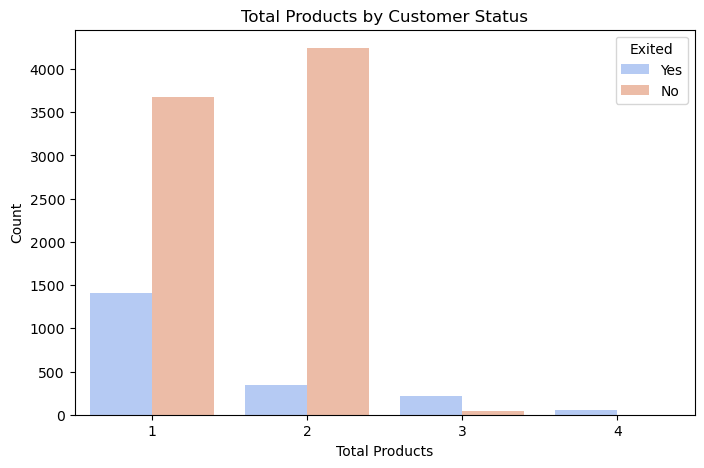

In [2338]:
# Total Products

# Count plot for total products by customer status

plt.figure(figsize=(8,5))
sb.countplot(x='Total Products', hue='Exited',data=bank_eng,palette='coolwarm')
plt.title('Total Products by Customer Status')
plt.xlabel('Total Products')
plt.ylabel('Count')
plt.show()

Result: This distribution shows that active customers with two products have the highest value, while exited customers with four products have the lowest value.

In [2341]:
# T-tests for Differences in Financial Variables

# T-test to compare balance 
t_stat_balance, p_value_balance = stats.ttest_ind(
    bank_eng[bank_eng['Exited'] == 'Yes']['Balance'],
    bank_eng[bank_eng['Exited'] == 'No']['Balance']
)
print(f"T-test for Balance: t-stat={t_stat_balance:.4f}, p-value={p_value_balance:.4f}")

# T-test for Credit Score
t_stat_credit, p_value_credit = stats.ttest_ind(
    bank_eng[bank_eng['Exited'] == 'Yes']['CreditScore'],
    bank_eng[bank_eng['Exited'] == 'No']['CreditScore']
)
print(f"T-test for Credit Score: t-stat={t_stat_credit:.4f}, p-value={p_value_credit:.4f}")

# T-test for Estimated Salary
t_stat_salary, p_value_salary = stats.ttest_ind(
    bank_eng[bank_eng['Exited'] == 'Yes']['EstimatedSalary'],
    bank_eng[bank_eng['Exited'] == 'No']['EstimatedSalary']
)
print(f"T-test for Estimated Salary: t-stat={t_stat_salary:.4f}, p-value={p_value_salary:.4f}")

# T-test for Age
t_stat_age, p_value_age = stats.ttest_ind(
    bank_eng[bank_eng['Exited'] == 'Yes']['Age'],
    bank_eng[bank_eng['Exited'] == 'No']['Age']
)
print(f"T-test for Age: t-stat={t_stat_age:.4f}, p-value={p_value_age:.4f}")


# Interpretation: If p-value < 0.05,there's a significant difference.

T-test for Balance: t-stat=11.9394, p-value=0.0000
T-test for Credit Score: t-stat=-2.7187, p-value=0.0066
T-test for Estimated Salary: t-stat=1.2078, p-value=0.2272
T-test for Age: t-stat=29.7630, p-value=0.0000


There's a significant difference between exited vs active customers and balance. 
There's a significant difference between exited vs active customers and credit score.
There's a significant difference between exited vs active customers and age.


5. Customer Segmentation: - 
Based on the available data, identify distinct customer segments (e.g., high-balance vs. low-balance customers) and analyze their unique characteristics
 - . - 
Provide insights into how the bank could optimize its services for each segment, such as offering tailored products to certain demographics or improving engagement with less active members.


In [2345]:
# Calculate percentiles for balance

high_balance_threshold = bank_eng['Balance'].quantile(0.75)
low_balance_threshold = bank_eng['Balance'].quantile(0.25)


# Create a new column for balance segments

bank_eng['Balance_Segment'] = pd.cut(bank_eng['Balance'], 
                                      bins=[-float('inf'), low_balance_threshold, high_balance_threshold, float('inf')],
                                      labels=['Low Balance', 'Medium Balance', 'High Balance'])
bank_eng['Balance_Segment']

0           Low Balance
2        Medium Balance
3          High Balance
4           Low Balance
5        Medium Balance
              ...      
9996        Low Balance
9997     Medium Balance
9998        Low Balance
9999     Medium Balance
10000      High Balance
Name: Balance_Segment, Length: 9997, dtype: category
Categories (3, object): ['Low Balance' < 'Medium Balance' < 'High Balance']

In [2347]:
#  Create a new column for credit score segments

bank_eng['Credit_Score_Segment'] = pd.cut(bank_eng['CreditScore'],
                                           bins=[-float('inf'), 500, 700, 850],
                                           labels=['Low Credit Score', 'Medium Credit Score', 'High Credit Score'])
bank_eng['Credit_Score_Segment']

0        Medium Credit Score
2        Medium Credit Score
3        Medium Credit Score
4        Medium Credit Score
5          High Credit Score
                ...         
9996       High Credit Score
9997     Medium Credit Score
9998       High Credit Score
9999       High Credit Score
10000      High Credit Score
Name: Credit_Score_Segment, Length: 9997, dtype: category
Categories (3, object): ['Low Credit Score' < 'Medium Credit Score' < 'High Credit Score']

In [2349]:
# Analyzing characteristics by balance segment

balance_segments_analysis = bank_eng.groupby('Balance_Segment').agg({
    'Age': ['mean', 'std'],
    'CreditScore': ['mean', 'std'],
    'Tenure': ['mean', 'std'],
    'Total Products': ['mean', 'std'],
}).reset_index()

# Display the analysis
balance_segments_analysis


Balance_Segment        Age            CreditScore               Tenure  \
                        mean        std        mean        std      mean   
0     Low Balance  38.436670  10.492907  649.483684  96.154226  5.072179   
1  Medium Balance  39.362184  10.577511  652.008501  96.615008  4.979907   
2    High Balance  38.940776  10.317716  649.808723  97.458567  4.979592   

            Total Products            
        std           mean       std  
0  2.860721       1.784845  0.496352  
1  2.921388       1.386656  0.574434  
2  2.892382       1.385354  0.581233

In [2351]:
# Analyzing characteristics by credit score segment

credit_score_segments_analysis = bank_eng.groupby('Credit_Score_Segment').agg({
    'Age': ['mean', 'std'],
    'Balance': ['mean', 'std'],
    'Tenure': ['mean', 'std'],
    'Total Products': ['mean', 'std'],
}).reset_index()

# Display the analysis
credit_score_segments_analysis


Credit_Score_Segment        Age                  Balance                \
                             mean        std          mean           std   
0     Low Credit Score  38.950233  10.229029  80241.272053  62754.250024   
1  Medium Credit Score  38.959442  10.456371  75927.176608  62403.193240   
2    High Credit Score  38.841463  10.609600  76819.154178  62302.052021   

     Tenure           Total Products            
       mean       std           mean       std  
0  5.074650  2.827440       1.517885  0.586112  
1  4.995992  2.894126       1.528855  0.584156  
2  5.034981  2.902658       1.535944  0.575858

In [2353]:
# Create tenure segments
short_tenure_threshold = bank_eng['Tenure'].quantile(0.33)
long_tenure_threshold = bank_eng['Tenure'].quantile(0.67)

bank_eng['Tenure_Segment'] = pd.cut(bank_eng['Tenure'], 
                                    bins=[-float('inf'), short_tenure_threshold, long_tenure_threshold, float('inf')],
                                    labels=['Short Tenure', 'Medium Tenure', 'Long Tenure'])

# Analyzing characteristics by tenure segment
tenure_segments_analysis = bank_eng.groupby('Tenure_Segment').agg({
    'Age': ['mean', 'std'],
    'Balance': ['mean', 'std'],
    'CreditScore': ['mean', 'std'],
    'Total Products': ['mean', 'std'],
}).reset_index()

# Display the analysis
tenure_segments_analysis


Tenure_Segment        Age                  Balance                \
                       mean        std          mean           std   
0   Short Tenure  39.175278  10.530400  77947.035196  62036.401235   
1  Medium Tenure  38.688611  10.393276  75119.362268  62753.947020   
2    Long Tenure  38.940376  10.578846  76609.457175  62306.290869   

  CreditScore            Total Products            
         mean        std           mean       std  
0  650.942050  96.614676       1.526977  0.588584  
1  649.764205  96.635328       1.530413  0.571186  
2  651.238095  96.784635       1.535014  0.588686

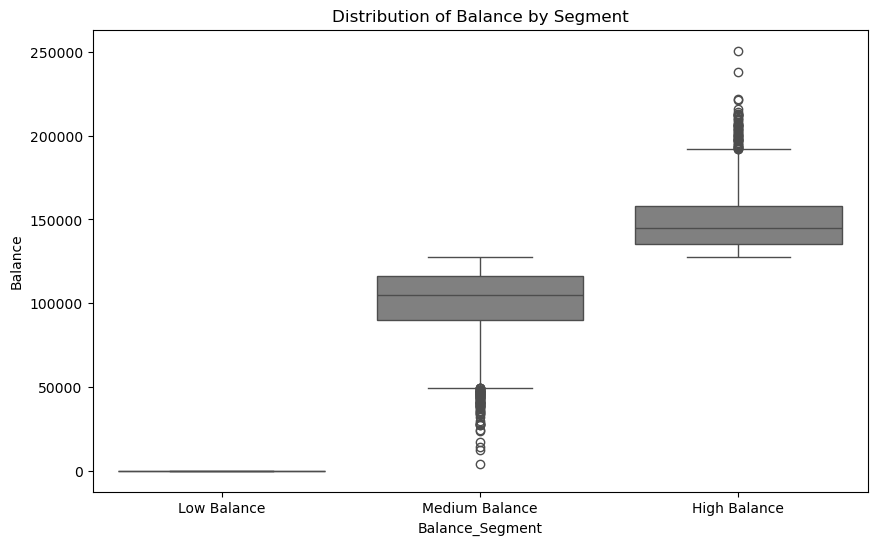

In [2355]:
# Visualizing the distribution of Balance by Segment
plt.figure(figsize=(10, 6))
sb.boxplot(x='Balance_Segment', y='Balance', data=bank_eng,color='grey')
plt.title('Distribution of Balance by Segment')
plt.show()

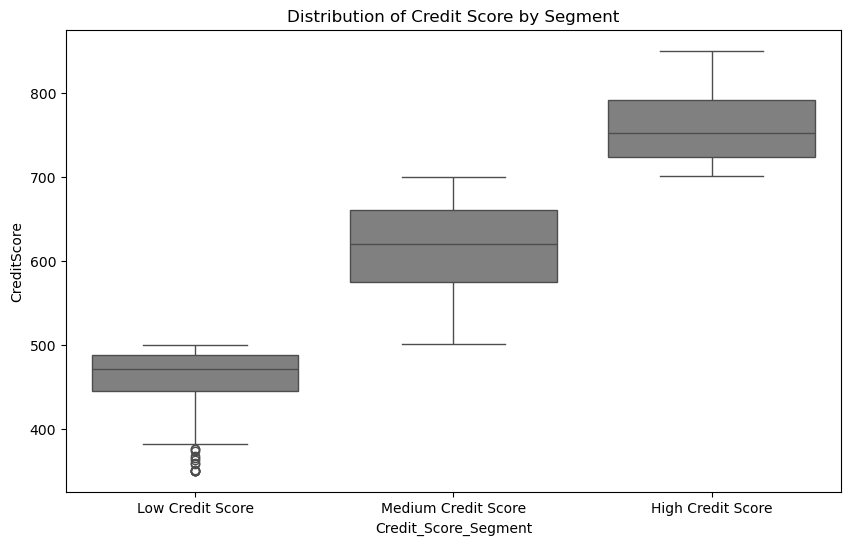

In [2357]:
# Visualizing the distribution of Credit Score by Segment
plt.figure(figsize=(10, 6))
sb.boxplot(x='Credit_Score_Segment', y='CreditScore', data=bank_eng,color='grey')
plt.title('Distribution of Credit Score by Segment')
plt.show()

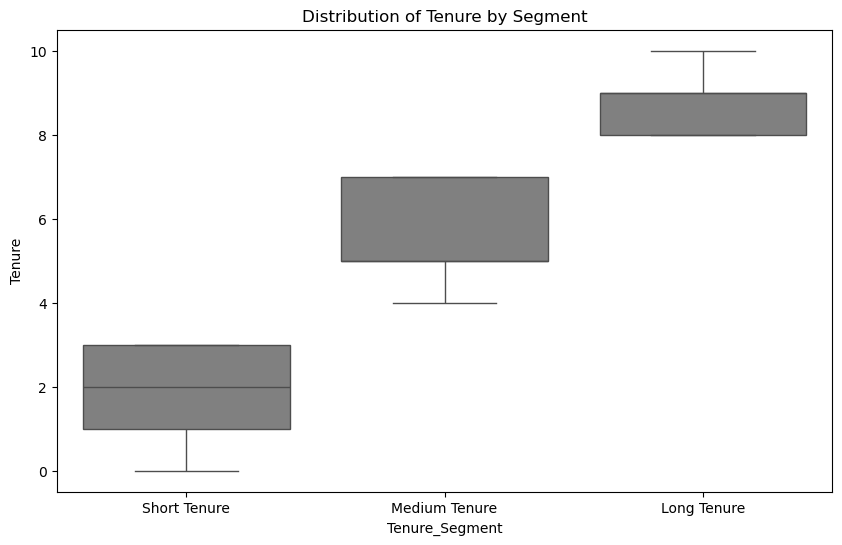

In [2359]:
# Visualizing the distribution of Tenure by Segment
plt.figure(figsize=(10, 6))
sb.boxplot(x='Tenure_Segment', y='Tenure', data=bank_eng,color='grey')
plt.title('Distribution of Tenure by Segment')
plt.show()

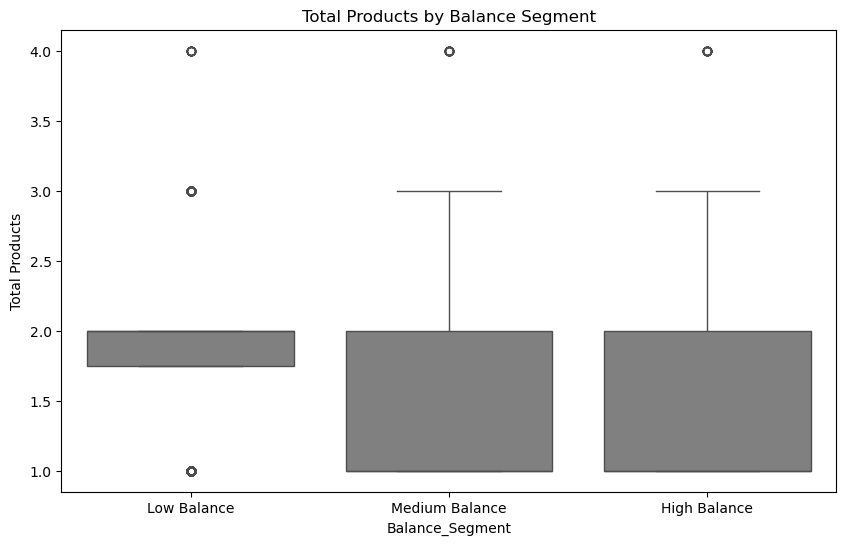

In [2361]:
# Visualizing the Number of Products by Segment
plt.figure(figsize=(10, 6))
sb.boxplot(x='Balance_Segment', y='Total Products', data=bank_eng,color='grey')
plt.title('Total Products by Balance Segment')
plt.show()

### Conclusion

Here are the key insights drawn from analyzing the data.

 - In Customer distribution we discovered that;

    - France has the highest value, then Germany and Spain has the same values.
    - The male has the highest value than the female.
    - The majority of customers fall within the adult age group, as identified in the age group analysis.
  
 The Age group have been categorised using the keys below:
    <18:Teenager
    
     18<=>30:Youth
    
     >30:Adult

o- The analysis between Credit Score and Balance reveals a similar relationship across genders. Both men and women exhibit a positive correlation between credit score and balance, with individuals holding higher balances tending to have higher credit scores. There is no significant difference in the strength or nature of the relationship between genders.
 
- The analysis of the relationship between customer tenure and total products reveals that customers with 3 or 4 products represent the largest group over the past six years, while those with fewer than 3 products constitute the smallest group.
 
- The analysis of the relationship between customer tenure and credit card owned reveals that the majority of customers who have been with the bank for more than seven years do not have a credit card, while those who have been with the bank for less than seven years are more likely to have a credit card.
  
- The analysis of the relationship between customer tenure and active members reveals that for more than six years, the number of inactive members has consistently exceeded the number of active members.
  
- In examining the impact of tenure on customer behavior, we found that short-term customers tend to have more products and higher balances than long-term customers.
  
-  In exploring the distribution of credit scores across age, gender, and geography, it reveals no significant differences.The distributions appear to be fairly consistent and likely equal across these factors.
  
-  When comparing the customer balance and estimated salary by gender,it was discovered that both genders have equal balances and similar estimated salaries.
  
-  When comparing customer balance and estimated salary by geography,it was discovered:
   
      - Germany has a higher balance than both Spain and France, with Spain and France displaying similar balance levels.
      -  Germany has a slightly higher estimated salary compared to Spain and France, while Spain and France have similar salary            levels.
        
-  When comparing customer balances by age, the data shows that balances are consistent across age groups. In contrast, the estimated salary analysis indicates that all salary values are equally distributed across age groups.
  
-  When comparing the demographics characteristics of customers,we found out that:
 
      - The age group classified as adults has a higher number of exited customers than active customers.
      - The male gender make up the highest number of active customers, as well as the lowest number of exited customers,then the          females have the highest number of the exited customers.
      - France has the highest number of active customers, while Germany has the lowest. It also indicates that France and                 Germany have the same number of exited customers, with Spain having the fewest exited customers.
        
 - When comparing the financial characteristics of customers,we found out that:

     - Credit score by customer status indicate that the values are equal.
     - The balance of the exited customers is slightly higher than active customer's balance.
     - The estimated salary of the exited customers is slightly higher than active customer's estimated salary.
     - Active customers with two products have the highest value, while exited customers with four products have the lowest value.
      
  
 - Based on the analysis, we can interpret the unique characteristics of each segement:

    - High-Balance Customers:
      
     - These customers are adult that have a higher average balance and credit scores.
     - These customers have been with the bank for a long period.
     - These customers hold more financial product.
  
    - Low-Balance Customers:
      
     - These customers have lower balances and might be teenagers.
     - They have fewer products with the bank,indicating a lower levelof engagemnt.
     -  Low-balance customers may have a shorter tenure, possibly because they haven’t fully engaged with the bank.
  
    -  Medium Balance Segment:
  
     -  Customers with moderate balances and engagement levels
     -  Likely to be open to new products if incentivized correctly.
     -  Often fall between high-engaged segments.
  

  - High-Balance,High-Credit Score Customers

    - Characteristics:
   
     - These customers are adult that have a higher average balance and credit scores.
     - These customers have been with the bank for a long period.
     - These customers hold more financial product.
   
    - Optimization Strategies:
   
     - Create a tiered loyalty program that provides perks such as fee waivers,enhanced interest rates,or dedicated relationship          managers.
     - Offer personalized financial advice,access to wealth management services, or invitation to VIP events.
     - Provide tailored product offerings like high-yield saving accounts, investment opportunities,or insurance products.
     - Send targeted communications highlighting exclusive products and benefits for high-value client.
   
  - Low-Balance,Low-Product Customers

     - Characteristics:
   
      -  These customers have lower balances and might be teenagers.
      -  They have fewer products with the bank,indicating a lower levelof engagemnt.
      -  Low-balance customers may have a shorter tenure, possibly because they haven’t fully engaged with the bank.
   
     -  Optimization Strategies:
   
      -  Offer incentives like referral bonuses or discounts for adopting additional products.
      -  Promote low-cost bundled packages(budget-friendly insurance options)to increase product adoption.
      -  Use gamification techniques to increase engagement(e.g,rewards for completing financial milestones or challenges).
      -  Create educational content on financial literacy to guide them toward better financial decisions.
      -  Offer digital rewards like loyalty points for transactions.
   

  - Moderate-Balance,Mid-Tier Customers

     - Characteristics:
   
      -  Customers with moderate balances and engagement levels
      -  Likely to be open to new products if incentivized correctly.
      -  Often fall between high-engaged segments.
   
     -  Optimization Strategies:
   
      -  Leverage data to recommend the next best product based on their transaction history(e.g., offering a personal loan to              those frequently using credit).
      -  Provide targeted offers for products like fixed deposits,personal loans, or travel-related perks.
      -  Assign customer success managers to proactively reach out and offer product recommendations.
      -  Implement lifecycle marketing campaigns based on tenure(e.g., special offers for anniversaries or birthdays).
      -  Reward loyal customers for continued engagement with perks like free account upgrade.
   
  - Customers with High Tenure but Low Product Adoption

    - Characteristics:
   
     - Customers who have been with the bank for a long time but only limited range of services.
     - These customers may be at risk of becoming inactive
   
    - Optimization Strategies:
   
     - Create targeted email or sms campaigns with incentives to use existing or new services.
     - Send personalized offers encouraging them to explore new products(e,g., introductory offers for investment products or             upgraded credit cards).
     - Use insights from surveys to improve service offerings or address pain points that may be preventing them from engaging            further.
     - Utilize automated notifications to remind them of account benfits, product updates, or relevent financial opportunities.
     - Gather feedbacks to understand why they haven't adopted more products and adjust offerings accordingly.
   
  - Customers at Risk of Churn

    - Characteristics:
   
     - Customers showing signs of low engagement(e.g., reduced product usage, balance drops, or frequent complaints).
     - Typically dissatisfied with current services or seeking better offer elsewhere.
   
    - Optimization Strategies:
   
     - Implement retention offers, such as fee waivers or better rates, for customers identified as high-risk.
     - Create win-back campaigns targeting recently inactive customers with limited time offers to re-engage them.
     - Offer special incentives for customers who are close to anniversary or account review date.


  


  





